In [108]:
import zipfile

In [109]:
with zipfile.ZipFile('project.zip','r') as zip_ref:
    zip_ref.extractall()

In [110]:
import tensorflow.compat.v1 as tf
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [111]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense,MaxPool2D,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Activation,Add

In [112]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,Adamax,RMSprop

In [113]:
#extract data from dataset
fldr='project/archive/UTKFace'

In [114]:
import os
flies=os.listdir(fldr)
print(flies)

['100_0_0_20170112213500903.jpg.chip.jpg', '100_0_0_20170112215240346.jpg.chip.jpg', '100_1_0_20170110183726390.jpg.chip.jpg', '100_1_0_20170112213001988.jpg.chip.jpg', '100_1_0_20170112213303693.jpg.chip.jpg', '100_1_0_20170112215032192.jpg.chip.jpg', '100_1_0_20170117195420803.jpg.chip.jpg', '100_1_0_20170119212053665.jpg.chip.jpg', '100_1_2_20170105174847679.jpg.chip.jpg', '100_1_2_20170112213615815.jpg.chip.jpg', '100_1_2_20170112222336458.jpg.chip.jpg', '101_0_0_20170112213500903.jpg.chip.jpg', '101_1_2_20170105174739309.jpg.chip.jpg', '103_0_2_20170112213001988.jpg.chip.jpg', '105_0_0_20170112213001988.jpg.chip.jpg', '105_1_0_20170112213001988.jpg.chip.jpg', '105_1_0_20170112213021902.jpg.chip.jpg', '105_1_0_20170112213507183.jpg.chip.jpg', '105_1_1_20170112213303693.jpg.chip.jpg', '10_0_0_20161220222308131.jpg.chip.jpg', '10_0_0_20170103200329407.jpg.chip.jpg', '10_0_0_20170103200522151.jpg.chip.jpg', '10_0_0_20170103233459275.jpg.chip.jpg', '10_0_0_20170104013211746.jpg.chip.jp

In [115]:
#create list of images from the dataset
ages=[]
genders=[]
images=[]

for fle in flies:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    total=fldr+'/'+fle
    print(total)
    image=cv2.imread(total)
    
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(48,48))
    images.append(image)

project/archive/UTKFace/100_0_0_20170112213500903.jpg.chip.jpg
project/archive/UTKFace/100_0_0_20170112215240346.jpg.chip.jpg
project/archive/UTKFace/100_1_0_20170110183726390.jpg.chip.jpg
project/archive/UTKFace/100_1_0_20170112213001988.jpg.chip.jpg
project/archive/UTKFace/100_1_0_20170112213303693.jpg.chip.jpg
project/archive/UTKFace/100_1_0_20170112215032192.jpg.chip.jpg
project/archive/UTKFace/100_1_0_20170117195420803.jpg.chip.jpg
project/archive/UTKFace/100_1_0_20170119212053665.jpg.chip.jpg
project/archive/UTKFace/100_1_2_20170105174847679.jpg.chip.jpg
project/archive/UTKFace/100_1_2_20170112213615815.jpg.chip.jpg
project/archive/UTKFace/100_1_2_20170112222336458.jpg.chip.jpg
project/archive/UTKFace/101_0_0_20170112213500903.jpg.chip.jpg
project/archive/UTKFace/101_1_2_20170105174739309.jpg.chip.jpg
project/archive/UTKFace/103_0_2_20170112213001988.jpg.chip.jpg
project/archive/UTKFace/105_0_0_20170112213001988.jpg.chip.jpg
project/archive/UTKFace/105_1_0_20170112213001988.jpg.c

project/archive/UTKFace/11_1_3_20170104222911112.jpg.chip.jpg
project/archive/UTKFace/11_1_3_20170104223632543.jpg.chip.jpg
project/archive/UTKFace/11_1_4_20161223225953124.jpg.chip.jpg
project/archive/UTKFace/11_1_4_20170103201747167.jpg.chip.jpg
project/archive/UTKFace/11_1_4_20170103212554964.jpg.chip.jpg
project/archive/UTKFace/11_1_4_20170103233340363.jpg.chip.jpg
project/archive/UTKFace/11_1_4_20170104005813063.jpg.chip.jpg
project/archive/UTKFace/11_1_4_20170109201611941.jpg.chip.jpg
project/archive/UTKFace/12_0_0_20170103200900511.jpg.chip.jpg
project/archive/UTKFace/12_0_0_20170103201859385.jpg.chip.jpg
project/archive/UTKFace/12_0_0_20170104013257914.jpg.chip.jpg
project/archive/UTKFace/12_0_0_20170109213205384.jpg.chip.jpg
project/archive/UTKFace/12_0_0_20170110215606404.jpg.chip.jpg
project/archive/UTKFace/12_0_0_20170110215739155.jpg.chip.jpg
project/archive/UTKFace/12_0_0_20170110220108459.jpg.chip.jpg
project/archive/UTKFace/12_0_0_20170110221819113.jpg.chip.jpg
project/

project/archive/UTKFace/14_0_2_20170103201038791.jpg.chip.jpg
project/archive/UTKFace/14_0_2_20170103201051263.jpg.chip.jpg
project/archive/UTKFace/14_0_2_20170104012412945.jpg.chip.jpg
project/archive/UTKFace/14_0_2_20170104012518441.jpg.chip.jpg
project/archive/UTKFace/14_0_2_20170104012541763.jpg.chip.jpg
project/archive/UTKFace/14_0_2_20170104013318514.jpg.chip.jpg
project/archive/UTKFace/14_0_2_20170110232701995.jpg.chip.jpg
project/archive/UTKFace/14_0_3_20170104012427337.jpg.chip.jpg
project/archive/UTKFace/14_0_3_20170104013434256.jpg.chip.jpg
project/archive/UTKFace/14_0_3_20170104225245755.jpg.chip.jpg
project/archive/UTKFace/14_0_3_20170104225533201.jpg.chip.jpg
project/archive/UTKFace/14_0_3_20170104225721488.jpg.chip.jpg
project/archive/UTKFace/14_0_3_20170104225858160.jpg.chip.jpg
project/archive/UTKFace/14_0_3_20170104230143521.jpg.chip.jpg
project/archive/UTKFace/14_0_3_20170109131758363.jpg.chip.jpg
project/archive/UTKFace/14_0_3_20170117181642515.jpg.chip.jpg
project/

project/archive/UTKFace/15_1_1_20170112230550725.jpg.chip.jpg
project/archive/UTKFace/15_1_1_20170116000638538.jpg.chip.jpg
project/archive/UTKFace/15_1_1_20170116164052068.jpg.chip.jpg
project/archive/UTKFace/15_1_2_20161219190855506.jpg.chip.jpg
project/archive/UTKFace/15_1_2_20161219193333691.jpg.chip.jpg
project/archive/UTKFace/15_1_2_20170102234824195.jpg.chip.jpg
project/archive/UTKFace/15_1_2_20170104012024121.jpg.chip.jpg
project/archive/UTKFace/15_1_2_20170104012031136.jpg.chip.jpg
project/archive/UTKFace/15_1_2_20170104012441969.jpg.chip.jpg
project/archive/UTKFace/15_1_2_20170104013425867.jpg.chip.jpg
project/archive/UTKFace/15_1_2_20170104015856031.jpg.chip.jpg
project/archive/UTKFace/15_1_2_20170116175234078.jpg.chip.jpg
project/archive/UTKFace/15_1_3_20161220145451968.jpg.chip.jpg
project/archive/UTKFace/15_1_3_20170104221641789.jpg.chip.jpg
project/archive/UTKFace/15_1_3_20170104221722328.jpg.chip.jpg
project/archive/UTKFace/15_1_3_20170104221725742.jpg.chip.jpg
project/

project/archive/UTKFace/17_0_0_20170117091447979.jpg.chip.jpg
project/archive/UTKFace/17_0_0_20170117134955265.jpg.chip.jpg
project/archive/UTKFace/17_0_0_20170117193043124.jpg.chip.jpg
project/archive/UTKFace/17_0_0_20170120133328941.jpg.chip.jpg
project/archive/UTKFace/17_0_1_20170110224421697.jpg.chip.jpg
project/archive/UTKFace/17_0_1_20170110232231513.jpg.chip.jpg
project/archive/UTKFace/17_0_1_20170113132534529.jpg.chip.jpg
project/archive/UTKFace/17_0_1_20170113132545264.jpg.chip.jpg
project/archive/UTKFace/17_0_1_20170113132556480.jpg.chip.jpg
project/archive/UTKFace/17_0_1_20170113145213577.jpg.chip.jpg
project/archive/UTKFace/17_0_1_20170113145220398.jpg.chip.jpg
project/archive/UTKFace/17_0_1_20170113151030175.jpg.chip.jpg
project/archive/UTKFace/17_0_1_20170113175010309.jpg.chip.jpg
project/archive/UTKFace/17_0_1_20170114025845366.jpg.chip.jpg
project/archive/UTKFace/17_0_1_20170114025858837.jpg.chip.jpg
project/archive/UTKFace/17_0_1_20170116182122450.jpg.chip.jpg
project/

project/archive/UTKFace/18_1_1_20170109214355606.jpg.chip.jpg
project/archive/UTKFace/18_1_1_20170112231616704.jpg.chip.jpg
project/archive/UTKFace/18_1_1_20170113002913732.jpg.chip.jpg
project/archive/UTKFace/18_1_1_20170113005132350.jpg.chip.jpg
project/archive/UTKFace/18_1_1_20170113005321501.jpg.chip.jpg
project/archive/UTKFace/18_1_1_20170114030232014.jpg.chip.jpg
project/archive/UTKFace/18_1_1_20170114030253404.jpg.chip.jpg
project/archive/UTKFace/18_1_1_20170114030258171.jpg.chip.jpg
project/archive/UTKFace/18_1_1_20170114030334837.jpg.chip.jpg
project/archive/UTKFace/18_1_1_20170114030339628.jpg.chip.jpg
project/archive/UTKFace/18_1_1_20170114030424059.jpg.chip.jpg
project/archive/UTKFace/18_1_1_20170116000609057.jpg.chip.jpg
project/archive/UTKFace/18_1_1_20170116164854853.jpg.chip.jpg
project/archive/UTKFace/18_1_1_20170116211857195.jpg.chip.jpg
project/archive/UTKFace/18_1_1_20170117140105352.jpg.chip.jpg
project/archive/UTKFace/18_1_1_20170117140201823.jpg.chip.jpg
project/

project/archive/UTKFace/1_0_2_20161219140748280.jpg.chip.jpg
project/archive/UTKFace/1_0_2_20161219140756601.jpg.chip.jpg
project/archive/UTKFace/1_0_2_20161219140811232.jpg.chip.jpg
project/archive/UTKFace/1_0_2_20161219140913256.jpg.chip.jpg
project/archive/UTKFace/1_0_2_20161219140929864.jpg.chip.jpg
project/archive/UTKFace/1_0_2_20161219140952943.jpg.chip.jpg
project/archive/UTKFace/1_0_2_20161219141023272.jpg.chip.jpg
project/archive/UTKFace/1_0_2_20161219141101408.jpg.chip.jpg
project/archive/UTKFace/1_0_2_20161219141226856.jpg.chip.jpg
project/archive/UTKFace/1_0_2_20161219141529089.jpg.chip.jpg
project/archive/UTKFace/1_0_2_20161219141758721.jpg.chip.jpg
project/archive/UTKFace/1_0_2_20161219141817185.jpg.chip.jpg
project/archive/UTKFace/1_0_2_20161219141824081.jpg.chip.jpg
project/archive/UTKFace/1_0_2_20161219141908313.jpg.chip.jpg
project/archive/UTKFace/1_0_2_20161219141912009.jpg.chip.jpg
project/archive/UTKFace/1_0_2_20161219141927321.jpg.chip.jpg
project/archive/UTKFace/

project/archive/UTKFace/1_0_3_20161220145532127.jpg.chip.jpg
project/archive/UTKFace/1_0_3_20161220145820446.jpg.chip.jpg
project/archive/UTKFace/1_0_3_20161220215943341.jpg.chip.jpg
project/archive/UTKFace/1_0_3_20161220215945524.jpg.chip.jpg
project/archive/UTKFace/1_0_3_20161220220036937.jpg.chip.jpg
project/archive/UTKFace/1_0_3_20161220220038618.jpg.chip.jpg
project/archive/UTKFace/1_0_3_20161220220040611.jpg.chip.jpg
project/archive/UTKFace/1_0_3_20161220220110553.jpg.chip.jpg
project/archive/UTKFace/1_0_3_20161220220116873.jpg.chip.jpg
project/archive/UTKFace/1_0_3_20161220220154425.jpg.chip.jpg
project/archive/UTKFace/1_0_3_20161220220317465.jpg.chip.jpg
project/archive/UTKFace/1_0_3_20161220220355890.jpg.chip.jpg
project/archive/UTKFace/1_0_3_20161220220358441.jpg.chip.jpg
project/archive/UTKFace/1_0_3_20161220220411577.jpg.chip.jpg
project/archive/UTKFace/1_0_3_20161220220418690.jpg.chip.jpg
project/archive/UTKFace/1_0_3_20161220220508802.jpg.chip.jpg
project/archive/UTKFace/

project/archive/UTKFace/1_1_3_20161219225008799.jpg.chip.jpg
project/archive/UTKFace/1_1_3_20161219225015272.jpg.chip.jpg
project/archive/UTKFace/1_1_3_20161219225018384.jpg.chip.jpg
project/archive/UTKFace/1_1_3_20161219225024289.jpg.chip.jpg
project/archive/UTKFace/1_1_3_20161219225027497.jpg.chip.jpg
project/archive/UTKFace/1_1_3_20161219225035448.jpg.chip.jpg
project/archive/UTKFace/1_1_3_20161219225050632.jpg.chip.jpg
project/archive/UTKFace/1_1_3_20161219225238384.jpg.chip.jpg
project/archive/UTKFace/1_1_3_20161219225245716.jpg.chip.jpg
project/archive/UTKFace/1_1_3_20161219225247616.jpg.chip.jpg
project/archive/UTKFace/1_1_3_20161219225259040.jpg.chip.jpg
project/archive/UTKFace/1_1_3_20161219225320176.jpg.chip.jpg
project/archive/UTKFace/1_1_3_20161219225416559.jpg.chip.jpg
project/archive/UTKFace/1_1_3_20161219225515600.jpg.chip.jpg
project/archive/UTKFace/1_1_3_20161219225543960.jpg.chip.jpg
project/archive/UTKFace/1_1_3_20161219225602184.jpg.chip.jpg
project/archive/UTKFace/

project/archive/UTKFace/20_1_1_20170114031114934.jpg.chip.jpg
project/archive/UTKFace/20_1_1_20170114031116660.jpg.chip.jpg
project/archive/UTKFace/20_1_1_20170114031128316.jpg.chip.jpg
project/archive/UTKFace/20_1_1_20170116003433569.jpg.chip.jpg
project/archive/UTKFace/20_1_1_20170116162433766.jpg.chip.jpg
project/archive/UTKFace/20_1_1_20170116164052068.jpg.chip.jpg
project/archive/UTKFace/20_1_1_20170116214348718.jpg.chip.jpg
project/archive/UTKFace/20_1_1_20170116215855605.jpg.chip.jpg
project/archive/UTKFace/20_1_1_20170117132642224.jpg.chip.jpg
project/archive/UTKFace/20_1_1_20170117171757218.jpg.chip.jpg
project/archive/UTKFace/20_1_1_20170117195034455.jpg.chip.jpg
project/archive/UTKFace/20_1_2_20170103225030704.jpg.chip.jpg
project/archive/UTKFace/20_1_2_20170103234750663.jpg.chip.jpg
project/archive/UTKFace/20_1_2_20170104015622356.jpg.chip.jpg
project/archive/UTKFace/20_1_2_20170104015722028.jpg.chip.jpg
project/archive/UTKFace/20_1_2_20170104020257804.jpg.chip.jpg
project/

project/archive/UTKFace/21_1_2_20170104020235605.jpg.chip.jpg
project/archive/UTKFace/21_1_2_20170104021056028.jpg.chip.jpg
project/archive/UTKFace/21_1_2_20170104021952837.jpg.chip.jpg
project/archive/UTKFace/21_1_2_20170105000725292.jpg.chip.jpg
project/archive/UTKFace/21_1_2_20170105002530429.jpg.chip.jpg
project/archive/UTKFace/21_1_2_20170105183505385.jpg.chip.jpg
project/archive/UTKFace/21_1_2_20170109132112364.jpg.chip.jpg
project/archive/UTKFace/21_1_2_20170109213056053.jpg.chip.jpg
project/archive/UTKFace/21_1_2_20170116163803744.jpg.chip.jpg
project/archive/UTKFace/21_1_2_20170116163813584.jpg.chip.jpg
project/archive/UTKFace/21_1_2_20170116164805815.jpg.chip.jpg
project/archive/UTKFace/21_1_2_20170116165009080.jpg.chip.jpg
project/archive/UTKFace/21_1_2_20170116170625776.jpg.chip.jpg
project/archive/UTKFace/21_1_2_20170116170710327.jpg.chip.jpg
project/archive/UTKFace/21_1_2_20170116170727930.jpg.chip.jpg
project/archive/UTKFace/21_1_2_20170116170750376.jpg.chip.jpg
project/

project/archive/UTKFace/22_1_1_20170113193237676.jpg.chip.jpg
project/archive/UTKFace/22_1_1_20170113195537459.jpg.chip.jpg
project/archive/UTKFace/22_1_1_20170114025217323.jpg.chip.jpg
project/archive/UTKFace/22_1_1_20170114025247512.jpg.chip.jpg
project/archive/UTKFace/22_1_1_20170114025927882.jpg.chip.jpg
project/archive/UTKFace/22_1_1_20170114030312289.jpg.chip.jpg
project/archive/UTKFace/22_1_1_20170114030632764.jpg.chip.jpg
project/archive/UTKFace/22_1_1_20170114030733636.jpg.chip.jpg
project/archive/UTKFace/22_1_1_20170114031133213.jpg.chip.jpg
project/archive/UTKFace/22_1_1_20170114031355312.jpg.chip.jpg
project/archive/UTKFace/22_1_1_20170114033220857.jpg.chip.jpg
project/archive/UTKFace/22_1_1_20170114033236159.jpg.chip.jpg
project/archive/UTKFace/22_1_1_20170114033252419.jpg.chip.jpg
project/archive/UTKFace/22_1_1_20170114033301951.jpg.chip.jpg
project/archive/UTKFace/22_1_1_20170116000638538.jpg.chip.jpg
project/archive/UTKFace/22_1_1_20170116162315750.jpg.chip.jpg
project/

project/archive/UTKFace/23_0_4_20170117194027228.jpg.chip.jpg
project/archive/UTKFace/23_0_4_20170117194033772.jpg.chip.jpg
project/archive/UTKFace/23_0_4_20170117194045437.jpg.chip.jpg
project/archive/UTKFace/23_0_4_20170117194048925.jpg.chip.jpg
project/archive/UTKFace/23_0_4_20170117194059597.jpg.chip.jpg
project/archive/UTKFace/23_0_4_20170117194102020.jpg.chip.jpg
project/archive/UTKFace/23_0_4_20170117194130117.jpg.chip.jpg
project/archive/UTKFace/23_1_0_20170103163102400.jpg.chip.jpg
project/archive/UTKFace/23_1_0_20170103163120968.jpg.chip.jpg
project/archive/UTKFace/23_1_0_20170103163123528.jpg.chip.jpg
project/archive/UTKFace/23_1_0_20170103180035647.jpg.chip.jpg
project/archive/UTKFace/23_1_0_20170103180412080.jpg.chip.jpg
project/archive/UTKFace/23_1_0_20170103180414191.jpg.chip.jpg
project/archive/UTKFace/23_1_0_20170103180451856.jpg.chip.jpg
project/archive/UTKFace/23_1_0_20170103180518664.jpg.chip.jpg
project/archive/UTKFace/23_1_0_20170103180703224.jpg.chip.jpg
project/

project/archive/UTKFace/24_0_0_20170116205530259.jpg.chip.jpg
project/archive/UTKFace/24_0_0_20170116205634434.jpg.chip.jpg
project/archive/UTKFace/24_0_0_20170116213539070.jpg.chip.jpg
project/archive/UTKFace/24_0_0_20170116214204433.jpg.chip.jpg
project/archive/UTKFace/24_0_0_20170116215529092.jpg.chip.jpg
project/archive/UTKFace/24_0_0_20170116215532270.jpg.chip.jpg
project/archive/UTKFace/24_0_0_20170116215611282.jpg.chip.jpg
project/archive/UTKFace/24_0_0_20170116220755400.jpg.chip.jpg
project/archive/UTKFace/24_0_0_20170116221910075.jpg.chip.jpg
project/archive/UTKFace/24_0_0_20170116221926893.jpg.chip.jpg
project/archive/UTKFace/24_0_0_20170116222146786.jpg.chip.jpg
project/archive/UTKFace/24_0_0_20170116222408305.jpg.chip.jpg
project/archive/UTKFace/24_0_0_20170116224743469.jpg.chip.jpg
project/archive/UTKFace/24_0_0_20170117003314278.jpg.chip.jpg
project/archive/UTKFace/24_0_0_20170117091201342.jpg.chip.jpg
project/archive/UTKFace/24_0_0_20170117135702616.jpg.chip.jpg
project/

project/archive/UTKFace/24_1_0_20170117150517123.jpg.chip.jpg
project/archive/UTKFace/24_1_0_20170117150524692.jpg.chip.jpg
project/archive/UTKFace/24_1_0_20170117150535820.jpg.chip.jpg
project/archive/UTKFace/24_1_0_20170117150538420.jpg.chip.jpg
project/archive/UTKFace/24_1_0_20170117150642259.jpg.chip.jpg
project/archive/UTKFace/24_1_0_20170117150644092.jpg.chip.jpg
project/archive/UTKFace/24_1_0_20170117150731090.jpg.chip.jpg
project/archive/UTKFace/24_1_0_20170117150740282.jpg.chip.jpg
project/archive/UTKFace/24_1_0_20170117150813388.jpg.chip.jpg
project/archive/UTKFace/24_1_0_20170117150815148.jpg.chip.jpg
project/archive/UTKFace/24_1_0_20170117150817978.jpg.chip.jpg
project/archive/UTKFace/24_1_0_20170117150848786.jpg.chip.jpg
project/archive/UTKFace/24_1_0_20170117150853517.jpg.chip.jpg
project/archive/UTKFace/24_1_0_20170117150858676.jpg.chip.jpg
project/archive/UTKFace/24_1_0_20170117150901270.jpg.chip.jpg
project/archive/UTKFace/24_1_0_20170117150909051.jpg.chip.jpg
project/

project/archive/UTKFace/24_1_3_20170104231625010.jpg.chip.jpg
project/archive/UTKFace/24_1_3_20170104231911026.jpg.chip.jpg
project/archive/UTKFace/24_1_3_20170104231916690.jpg.chip.jpg
project/archive/UTKFace/24_1_3_20170104231923674.jpg.chip.jpg
project/archive/UTKFace/24_1_3_20170104231931545.jpg.chip.jpg
project/archive/UTKFace/24_1_3_20170104231937977.jpg.chip.jpg
project/archive/UTKFace/24_1_3_20170104231939707.jpg.chip.jpg
project/archive/UTKFace/24_1_3_20170104231950346.jpg.chip.jpg
project/archive/UTKFace/24_1_3_20170104231953658.jpg.chip.jpg
project/archive/UTKFace/24_1_3_20170104232256105.jpg.chip.jpg
project/archive/UTKFace/24_1_3_20170104232305465.jpg.chip.jpg
project/archive/UTKFace/24_1_3_20170104232545657.jpg.chip.jpg
project/archive/UTKFace/24_1_3_20170104234737428.jpg.chip.jpg
project/archive/UTKFace/24_1_3_20170104234808251.jpg.chip.jpg
project/archive/UTKFace/24_1_3_20170104234822506.jpg.chip.jpg
project/archive/UTKFace/24_1_3_20170104235106686.jpg.chip.jpg
project/

project/archive/UTKFace/25_0_3_20170104214432805.jpg.chip.jpg
project/archive/UTKFace/25_0_3_20170104214444117.jpg.chip.jpg
project/archive/UTKFace/25_0_3_20170104214558568.jpg.chip.jpg
project/archive/UTKFace/25_0_3_20170104214602149.jpg.chip.jpg
project/archive/UTKFace/25_0_3_20170104214610101.jpg.chip.jpg
project/archive/UTKFace/25_0_3_20170104214613229.jpg.chip.jpg
project/archive/UTKFace/25_0_3_20170104220223342.jpg.chip.jpg
project/archive/UTKFace/25_0_3_20170104230227202.jpg.chip.jpg
project/archive/UTKFace/25_0_3_20170104230440360.jpg.chip.jpg
project/archive/UTKFace/25_0_3_20170104230516489.jpg.chip.jpg
project/archive/UTKFace/25_0_3_20170105175316102.jpg.chip.jpg
project/archive/UTKFace/25_0_3_20170107213404617.jpg.chip.jpg
project/archive/UTKFace/25_0_3_20170116222907776.jpg.chip.jpg
project/archive/UTKFace/25_0_3_20170117134128269.jpg.chip.jpg
project/archive/UTKFace/25_0_3_20170117134150022.jpg.chip.jpg
project/archive/UTKFace/25_0_3_20170117134725751.jpg.chip.jpg
project/

project/archive/UTKFace/25_1_3_20170104232046530.jpg.chip.jpg
project/archive/UTKFace/25_1_3_20170104232048826.jpg.chip.jpg
project/archive/UTKFace/25_1_3_20170104232049890.jpg.chip.jpg
project/archive/UTKFace/25_1_3_20170104232058250.jpg.chip.jpg
project/archive/UTKFace/25_1_3_20170104232101034.jpg.chip.jpg
project/archive/UTKFace/25_1_3_20170104232710103.jpg.chip.jpg
project/archive/UTKFace/25_1_3_20170104234854715.jpg.chip.jpg
project/archive/UTKFace/25_1_3_20170104234936774.jpg.chip.jpg
project/archive/UTKFace/25_1_3_20170104234944475.jpg.chip.jpg
project/archive/UTKFace/25_1_3_20170105000930603.jpg.chip.jpg
project/archive/UTKFace/25_1_3_20170109132228225.jpg.chip.jpg
project/archive/UTKFace/25_1_3_20170109132634146.jpg.chip.jpg
project/archive/UTKFace/25_1_3_20170109134902771.jpg.chip.jpg
project/archive/UTKFace/25_1_3_20170109135843276.jpg.chip.jpg
project/archive/UTKFace/25_1_3_20170109213212198.jpg.chip.jpg
project/archive/UTKFace/25_1_3_20170109213236360.jpg.chip.jpg
project/

project/archive/UTKFace/26_0_1_20170103210459306.jpg.chip.jpg
project/archive/UTKFace/26_0_1_20170103235317796.jpg.chip.jpg
project/archive/UTKFace/26_0_1_20170104170637953.jpg.chip.jpg
project/archive/UTKFace/26_0_1_20170104230506569.jpg.chip.jpg
project/archive/UTKFace/26_0_1_20170105183720623.jpg.chip.jpg
project/archive/UTKFace/26_0_1_20170105183731642.jpg.chip.jpg
project/archive/UTKFace/26_0_1_20170105183906447.jpg.chip.jpg
project/archive/UTKFace/26_0_1_20170112210717501.jpg.chip.jpg
project/archive/UTKFace/26_0_1_20170113132700512.jpg.chip.jpg
project/archive/UTKFace/26_0_1_20170113133114391.jpg.chip.jpg
project/archive/UTKFace/26_0_1_20170113133259775.jpg.chip.jpg
project/archive/UTKFace/26_0_1_20170113133847367.jpg.chip.jpg
project/archive/UTKFace/26_0_1_20170113133950129.jpg.chip.jpg
project/archive/UTKFace/26_0_1_20170113134232465.jpg.chip.jpg
project/archive/UTKFace/26_0_1_20170113134233888.jpg.chip.jpg
project/archive/UTKFace/26_0_1_20170113134235602.jpg.chip.jpg
project/

project/archive/UTKFace/26_0_2_20170116182411806.jpg.chip.jpg
project/archive/UTKFace/26_0_2_20170116182413642.jpg.chip.jpg
project/archive/UTKFace/26_0_2_20170116182415133.jpg.chip.jpg
project/archive/UTKFace/26_0_2_20170116182417422.jpg.chip.jpg
project/archive/UTKFace/26_0_2_20170116182447321.jpg.chip.jpg
project/archive/UTKFace/26_0_2_20170116182451477.jpg.chip.jpg
project/archive/UTKFace/26_0_2_20170116182453051.jpg.chip.jpg
project/archive/UTKFace/26_0_2_20170116182459791.jpg.chip.jpg
project/archive/UTKFace/26_0_2_20170116182621915.jpg.chip.jpg
project/archive/UTKFace/26_0_2_20170116182629321.jpg.chip.jpg
project/archive/UTKFace/26_0_2_20170116182630634.jpg.chip.jpg
project/archive/UTKFace/26_0_2_20170116182654158.jpg.chip.jpg
project/archive/UTKFace/26_0_2_20170116182756349.jpg.chip.jpg
project/archive/UTKFace/26_0_2_20170116183002811.jpg.chip.jpg
project/archive/UTKFace/26_0_2_20170116183004847.jpg.chip.jpg
project/archive/UTKFace/26_0_2_20170116183020432.jpg.chip.jpg
project/

project/archive/UTKFace/26_1_0_20170103181926881.jpg.chip.jpg
project/archive/UTKFace/26_1_0_20170103181940954.jpg.chip.jpg
project/archive/UTKFace/26_1_0_20170103181948785.jpg.chip.jpg
project/archive/UTKFace/26_1_0_20170103182026289.jpg.chip.jpg
project/archive/UTKFace/26_1_0_20170103182040225.jpg.chip.jpg
project/archive/UTKFace/26_1_0_20170103182456297.jpg.chip.jpg
project/archive/UTKFace/26_1_0_20170103213110260.jpg.chip.jpg
project/archive/UTKFace/26_1_0_20170103224921463.jpg.chip.jpg
project/archive/UTKFace/26_1_0_20170103234817732.jpg.chip.jpg
project/archive/UTKFace/26_1_0_20170103235707476.jpg.chip.jpg
project/archive/UTKFace/26_1_0_20170104021254429.jpg.chip.jpg
project/archive/UTKFace/26_1_0_20170104021504132.jpg.chip.jpg
project/archive/UTKFace/26_1_0_20170104021534429.jpg.chip.jpg
project/archive/UTKFace/26_1_0_20170104022111485.jpg.chip.jpg
project/archive/UTKFace/26_1_0_20170104022424245.jpg.chip.jpg
project/archive/UTKFace/26_1_0_20170104165749289.jpg.chip.jpg
project/

project/archive/UTKFace/26_1_1_20170112233658982.jpg.chip.jpg
project/archive/UTKFace/26_1_1_20170112234340711.jpg.chip.jpg
project/archive/UTKFace/26_1_1_20170112235057871.jpg.chip.jpg
project/archive/UTKFace/26_1_1_20170112235250049.jpg.chip.jpg
project/archive/UTKFace/26_1_1_20170112235515129.jpg.chip.jpg
project/archive/UTKFace/26_1_1_20170112235540169.jpg.chip.jpg
project/archive/UTKFace/26_1_1_20170112235543761.jpg.chip.jpg
project/archive/UTKFace/26_1_1_20170112235910121.jpg.chip.jpg
project/archive/UTKFace/26_1_1_20170112235913713.jpg.chip.jpg
project/archive/UTKFace/26_1_1_20170112235923687.jpg.chip.jpg
project/archive/UTKFace/26_1_1_20170112235926962.jpg.chip.jpg
project/archive/UTKFace/26_1_1_20170112235940056.jpg.chip.jpg
project/archive/UTKFace/26_1_1_20170112235952009.jpg.chip.jpg
project/archive/UTKFace/26_1_1_20170113000003360.jpg.chip.jpg
project/archive/UTKFace/26_1_1_20170113000030801.jpg.chip.jpg
project/archive/UTKFace/26_1_1_20170113000114594.jpg.chip.jpg
project/

project/archive/UTKFace/26_1_2_20170116175323304.jpg.chip.jpg
project/archive/UTKFace/26_1_2_20170116175333732.jpg.chip.jpg
project/archive/UTKFace/26_1_2_20170116175339024.jpg.chip.jpg
project/archive/UTKFace/26_1_2_20170116175341740.jpg.chip.jpg
project/archive/UTKFace/26_1_2_20170116175437182.jpg.chip.jpg
project/archive/UTKFace/26_1_2_20170116175443429.jpg.chip.jpg
project/archive/UTKFace/26_1_2_20170116175445643.jpg.chip.jpg
project/archive/UTKFace/26_1_2_20170116175456595.jpg.chip.jpg
project/archive/UTKFace/26_1_2_20170116175458291.jpg.chip.jpg
project/archive/UTKFace/26_1_2_20170116175501158.jpg.chip.jpg
project/archive/UTKFace/26_1_2_20170116175503224.jpg.chip.jpg
project/archive/UTKFace/26_1_2_20170116175505151.jpg.chip.jpg
project/archive/UTKFace/26_1_2_20170116175506863.jpg.chip.jpg
project/archive/UTKFace/26_1_2_20170116175508654.jpg.chip.jpg
project/archive/UTKFace/26_1_2_20170116175511254.jpg.chip.jpg
project/archive/UTKFace/26_1_2_20170116175512769.jpg.chip.jpg
project/

project/archive/UTKFace/26_1_3_20170117154410734.jpg.chip.jpg
project/archive/UTKFace/26_1_3_20170117154416199.jpg.chip.jpg
project/archive/UTKFace/26_1_3_20170117154458652.jpg.chip.jpg
project/archive/UTKFace/26_1_3_20170117154510952.jpg.chip.jpg
project/archive/UTKFace/26_1_3_20170117154601686.jpg.chip.jpg
project/archive/UTKFace/26_1_3_20170117154607967.jpg.chip.jpg
project/archive/UTKFace/26_1_3_20170117154614886.jpg.chip.jpg
project/archive/UTKFace/26_1_3_20170117154635126.jpg.chip.jpg
project/archive/UTKFace/26_1_3_20170117154744110.jpg.chip.jpg
project/archive/UTKFace/26_1_3_20170117154750044.jpg.chip.jpg
project/archive/UTKFace/26_1_3_20170117154752639.jpg.chip.jpg
project/archive/UTKFace/26_1_3_20170117154821244.jpg.chip.jpg
project/archive/UTKFace/26_1_3_20170117154838647.jpg.chip.jpg
project/archive/UTKFace/26_1_3_20170117154857092.jpg.chip.jpg
project/archive/UTKFace/26_1_3_20170117154935165.jpg.chip.jpg
project/archive/UTKFace/26_1_3_20170117154940189.jpg.chip.jpg
project/

project/archive/UTKFace/27_0_0_20170116204122640.jpg.chip.jpg
project/archive/UTKFace/27_0_0_20170116204126806.jpg.chip.jpg
project/archive/UTKFace/27_0_0_20170116204136393.jpg.chip.jpg
project/archive/UTKFace/27_0_0_20170116204141166.jpg.chip.jpg
project/archive/UTKFace/27_0_0_20170116204347283.jpg.chip.jpg
project/archive/UTKFace/27_0_0_20170116204811619.jpg.chip.jpg
project/archive/UTKFace/27_0_0_20170116204851886.jpg.chip.jpg
project/archive/UTKFace/27_0_0_20170116205016692.jpg.chip.jpg
project/archive/UTKFace/27_0_0_20170116205304488.jpg.chip.jpg
project/archive/UTKFace/27_0_0_20170116205311022.jpg.chip.jpg
project/archive/UTKFace/27_0_0_20170116205321366.jpg.chip.jpg
project/archive/UTKFace/27_0_0_20170116205604495.jpg.chip.jpg
project/archive/UTKFace/27_0_0_20170116205629794.jpg.chip.jpg
project/archive/UTKFace/27_0_0_20170116213542860.jpg.chip.jpg
project/archive/UTKFace/27_0_0_20170116215525646.jpg.chip.jpg
project/archive/UTKFace/27_0_0_20170116220601280.jpg.chip.jpg
project/

project/archive/UTKFace/27_0_4_20170117202119374.jpg.chip.jpg
project/archive/UTKFace/27_0_4_20170117202219111.jpg.chip.jpg
project/archive/UTKFace/27_1_0_20170103163215342.jpg.chip.jpg
project/archive/UTKFace/27_1_0_20170103175534240.jpg.chip.jpg
project/archive/UTKFace/27_1_0_20170103180241879.jpg.chip.jpg
project/archive/UTKFace/27_1_0_20170103180510792.jpg.chip.jpg
project/archive/UTKFace/27_1_0_20170103180554504.jpg.chip.jpg
project/archive/UTKFace/27_1_0_20170103181541352.jpg.chip.jpg
project/archive/UTKFace/27_1_0_20170103182159657.jpg.chip.jpg
project/archive/UTKFace/27_1_0_20170103182420963.jpg.chip.jpg
project/archive/UTKFace/27_1_0_20170103182501706.jpg.chip.jpg
project/archive/UTKFace/27_1_0_20170103183523123.jpg.chip.jpg
project/archive/UTKFace/27_1_0_20170103183711648.jpg.chip.jpg
project/archive/UTKFace/27_1_0_20170103210530706.jpg.chip.jpg
project/archive/UTKFace/27_1_0_20170103223625383.jpg.chip.jpg
project/archive/UTKFace/27_1_0_20170103230354912.jpg.chip.jpg
project/

project/archive/UTKFace/27_1_4_20170103210539730.jpg.chip.jpg
project/archive/UTKFace/27_1_4_20170103223631359.jpg.chip.jpg
project/archive/UTKFace/27_1_4_20170103225912217.jpg.chip.jpg
project/archive/UTKFace/27_1_4_20170103230157624.jpg.chip.jpg
project/archive/UTKFace/27_1_4_20170103230450385.jpg.chip.jpg
project/archive/UTKFace/27_1_4_20170103230557794.jpg.chip.jpg
project/archive/UTKFace/27_1_4_20170103234931350.jpg.chip.jpg
project/archive/UTKFace/27_1_4_20170103235051403.jpg.chip.jpg
project/archive/UTKFace/27_1_4_20170104165220264.jpg.chip.jpg
project/archive/UTKFace/27_1_4_20170112234325680.jpg.chip.jpg
project/archive/UTKFace/27_1_4_20170113011320472.jpg.chip.jpg
project/archive/UTKFace/27_1_4_20170116180404068.jpg.chip.jpg
project/archive/UTKFace/27_1_4_20170116211825926.jpg.chip.jpg
project/archive/UTKFace/27_1_4_20170117164636325.jpg.chip.jpg
project/archive/UTKFace/27_1_4_20170117175508442.jpg.chip.jpg
project/archive/UTKFace/27_1_4_20170117202236181.jpg.chip.jpg
project/

project/archive/UTKFace/28_0_3_20170104230628769.jpg.chip.jpg
project/archive/UTKFace/28_0_3_20170104232323178.jpg.chip.jpg
project/archive/UTKFace/28_0_3_20170104232432992.jpg.chip.jpg
project/archive/UTKFace/28_0_3_20170105175516710.jpg.chip.jpg
project/archive/UTKFace/28_0_3_20170109002910810.jpg.chip.jpg
project/archive/UTKFace/28_0_3_20170113153014880.jpg.chip.jpg
project/archive/UTKFace/28_0_3_20170116024927038.jpg.chip.jpg
project/archive/UTKFace/28_0_3_20170116214434468.jpg.chip.jpg
project/archive/UTKFace/28_0_3_20170116223108046.jpg.chip.jpg
project/archive/UTKFace/28_0_3_20170117020054178.jpg.chip.jpg
project/archive/UTKFace/28_0_3_20170117020056667.jpg.chip.jpg
project/archive/UTKFace/28_0_3_20170117020733772.jpg.chip.jpg
project/archive/UTKFace/28_0_3_20170117120957310.jpg.chip.jpg
project/archive/UTKFace/28_0_3_20170117120959404.jpg.chip.jpg
project/archive/UTKFace/28_0_3_20170117121559306.jpg.chip.jpg
project/archive/UTKFace/28_0_3_20170117144207130.jpg.chip.jpg
project/

project/archive/UTKFace/28_1_1_20170116215513416.jpg.chip.jpg
project/archive/UTKFace/28_1_1_20170116223115624.jpg.chip.jpg
project/archive/UTKFace/28_1_1_20170116225020910.jpg.chip.jpg
project/archive/UTKFace/28_1_1_20170116225303264.jpg.chip.jpg
project/archive/UTKFace/28_1_1_20170116231107181.jpg.chip.jpg
project/archive/UTKFace/28_1_1_20170116231251529.jpg.chip.jpg
project/archive/UTKFace/28_1_1_20170116231836061.jpg.chip.jpg
project/archive/UTKFace/28_1_1_20170116232347382.jpg.chip.jpg
project/archive/UTKFace/28_1_1_20170116234442332.jpg.chip.jpg
project/archive/UTKFace/28_1_1_20170116234825295.jpg.chip.jpg
project/archive/UTKFace/28_1_1_20170116235605486.jpg.chip.jpg
project/archive/UTKFace/28_1_1_20170117010436105.jpg.chip.jpg
project/archive/UTKFace/28_1_1_20170117020151221.jpg.chip.jpg
project/archive/UTKFace/28_1_1_20170117020401850.jpg.chip.jpg
project/archive/UTKFace/28_1_1_20170117020405380.jpg.chip.jpg
project/archive/UTKFace/28_1_1_20170117020409415.jpg.chip.jpg
project/

project/archive/UTKFace/29_0_0_20170116205219294.jpg.chip.jpg
project/archive/UTKFace/29_0_0_20170116214245025.jpg.chip.jpg
project/archive/UTKFace/29_0_0_20170116214300022.jpg.chip.jpg
project/archive/UTKFace/29_0_0_20170116214417558.jpg.chip.jpg
project/archive/UTKFace/29_0_0_20170116221002399.jpg.chip.jpg
project/archive/UTKFace/29_0_0_20170116221737674.jpg.chip.jpg
project/archive/UTKFace/29_0_0_20170116221741960.jpg.chip.jpg
project/archive/UTKFace/29_0_0_20170116224736533.jpg.chip.jpg
project/archive/UTKFace/29_0_0_20170116225141614.jpg.chip.jpg
project/archive/UTKFace/29_0_0_20170116233154004.jpg.chip.jpg
project/archive/UTKFace/29_0_0_20170117010514579.jpg.chip.jpg
project/archive/UTKFace/29_0_0_20170117010705850.jpg.chip.jpg
project/archive/UTKFace/29_0_0_20170117020823000.jpg.chip.jpg
project/archive/UTKFace/29_0_0_20170117094526002.jpg.chip.jpg
project/archive/UTKFace/29_0_0_20170117094750881.jpg.chip.jpg
project/archive/UTKFace/29_0_0_20170117104629440.jpg.chip.jpg
project/

project/archive/UTKFace/29_1_0_20170103183548206.jpg.chip.jpg
project/archive/UTKFace/29_1_0_20170103183824867.jpg.chip.jpg
project/archive/UTKFace/29_1_0_20170104021759835.jpg.chip.jpg
project/archive/UTKFace/29_1_0_20170104021946334.jpg.chip.jpg
project/archive/UTKFace/29_1_0_20170104022059373.jpg.chip.jpg
project/archive/UTKFace/29_1_0_20170104022706451.jpg.chip.jpg
project/archive/UTKFace/29_1_0_20170104023227077.jpg.chip.jpg
project/archive/UTKFace/29_1_0_20170104023236006.jpg.chip.jpg
project/archive/UTKFace/29_1_0_20170104023330606.jpg.chip.jpg
project/archive/UTKFace/29_1_0_20170104165932577.jpg.chip.jpg
project/archive/UTKFace/29_1_0_20170104170615233.jpg.chip.jpg
project/archive/UTKFace/29_1_0_20170104172544539.jpg.chip.jpg
project/archive/UTKFace/29_1_0_20170104172655682.jpg.chip.jpg
project/archive/UTKFace/29_1_0_20170104184312581.jpg.chip.jpg
project/archive/UTKFace/29_1_0_20170104185616837.jpg.chip.jpg
project/archive/UTKFace/29_1_0_20170104192921991.jpg.chip.jpg
project/

project/archive/UTKFace/2_0_0_20170110212901886.jpg.chip.jpg
project/archive/UTKFace/2_0_0_20170110212905173.jpg.chip.jpg
project/archive/UTKFace/2_0_0_20170110213022114.jpg.chip.jpg
project/archive/UTKFace/2_0_0_20170110213051007.jpg.chip.jpg
project/archive/UTKFace/2_0_0_20170110213103595.jpg.chip.jpg
project/archive/UTKFace/2_0_0_20170110213128362.jpg.chip.jpg
project/archive/UTKFace/2_0_0_20170110213143544.jpg.chip.jpg
project/archive/UTKFace/2_0_0_20170110213146269.jpg.chip.jpg
project/archive/UTKFace/2_0_0_20170110213208884.jpg.chip.jpg
project/archive/UTKFace/2_0_0_20170110213227212.jpg.chip.jpg
project/archive/UTKFace/2_0_0_20170110213234033.jpg.chip.jpg
project/archive/UTKFace/2_0_0_20170110213247257.jpg.chip.jpg
project/archive/UTKFace/2_0_0_20170110213250253.jpg.chip.jpg
project/archive/UTKFace/2_0_0_20170110213349752.jpg.chip.jpg
project/archive/UTKFace/2_0_0_20170110213507337.jpg.chip.jpg
project/archive/UTKFace/2_0_0_20170110213639642.jpg.chip.jpg
project/archive/UTKFace/

project/archive/UTKFace/2_1_2_20161219151414451.jpg.chip.jpg
project/archive/UTKFace/2_1_2_20161219151440283.jpg.chip.jpg
project/archive/UTKFace/2_1_2_20161219151851452.jpg.chip.jpg
project/archive/UTKFace/2_1_2_20161219151908347.jpg.chip.jpg
project/archive/UTKFace/2_1_2_20161219151919100.jpg.chip.jpg
project/archive/UTKFace/2_1_2_20161219151944003.jpg.chip.jpg
project/archive/UTKFace/2_1_2_20161219152910484.jpg.chip.jpg
project/archive/UTKFace/2_1_2_20161219152918020.jpg.chip.jpg
project/archive/UTKFace/2_1_2_20161219153759916.jpg.chip.jpg
project/archive/UTKFace/2_1_2_20161219153833780.jpg.chip.jpg
project/archive/UTKFace/2_1_2_20161219154029060.jpg.chip.jpg
project/archive/UTKFace/2_1_2_20161219154604597.jpg.chip.jpg
project/archive/UTKFace/2_1_2_20161219155546973.jpg.chip.jpg
project/archive/UTKFace/2_1_2_20161219155720461.jpg.chip.jpg
project/archive/UTKFace/2_1_2_20161219155732445.jpg.chip.jpg
project/archive/UTKFace/2_1_2_20161219160232453.jpg.chip.jpg
project/archive/UTKFace/

project/archive/UTKFace/30_0_0_20170117151826355.jpg.chip.jpg
project/archive/UTKFace/30_0_0_20170117152309069.jpg.chip.jpg
project/archive/UTKFace/30_0_0_20170117152404661.jpg.chip.jpg
project/archive/UTKFace/30_0_0_20170117153441021.jpg.chip.jpg
project/archive/UTKFace/30_0_0_20170117154851974.jpg.chip.jpg
project/archive/UTKFace/30_0_0_20170117171057875.jpg.chip.jpg
project/archive/UTKFace/30_0_0_20170117171547706.jpg.chip.jpg
project/archive/UTKFace/30_0_0_20170117171629282.jpg.chip.jpg
project/archive/UTKFace/30_0_0_20170117171825818.jpg.chip.jpg
project/archive/UTKFace/30_0_0_20170117171914259.jpg.chip.jpg
project/archive/UTKFace/30_0_0_20170117172014219.jpg.chip.jpg
project/archive/UTKFace/30_0_0_20170117172644485.jpg.chip.jpg
project/archive/UTKFace/30_0_0_20170117180449799.jpg.chip.jpg
project/archive/UTKFace/30_0_0_20170117181104996.jpg.chip.jpg
project/archive/UTKFace/30_0_0_20170117181118268.jpg.chip.jpg
project/archive/UTKFace/30_0_0_20170117181207964.jpg.chip.jpg
project/

project/archive/UTKFace/30_1_0_20170117114647665.jpg.chip.jpg
project/archive/UTKFace/30_1_0_20170117114710101.jpg.chip.jpg
project/archive/UTKFace/30_1_0_20170117120237417.jpg.chip.jpg
project/archive/UTKFace/30_1_0_20170117122000135.jpg.chip.jpg
project/archive/UTKFace/30_1_0_20170117131022202.jpg.chip.jpg
project/archive/UTKFace/30_1_0_20170117131055904.jpg.chip.jpg
project/archive/UTKFace/30_1_0_20170117131057509.jpg.chip.jpg
project/archive/UTKFace/30_1_0_20170117131108776.jpg.chip.jpg
project/archive/UTKFace/30_1_0_20170117131111201.jpg.chip.jpg
project/archive/UTKFace/30_1_0_20170117131116466.jpg.chip.jpg
project/archive/UTKFace/30_1_0_20170117131118803.jpg.chip.jpg
project/archive/UTKFace/30_1_0_20170117131121016.jpg.chip.jpg
project/archive/UTKFace/30_1_0_20170117134255854.jpg.chip.jpg
project/archive/UTKFace/30_1_0_20170117134355934.jpg.chip.jpg
project/archive/UTKFace/30_1_0_20170117135257534.jpg.chip.jpg
project/archive/UTKFace/30_1_0_20170117135302551.jpg.chip.jpg
project/

project/archive/UTKFace/30_1_4_20170117143625216.jpg.chip.jpg
project/archive/UTKFace/30_1_4_20170117193820102.jpg.chip.jpg
project/archive/UTKFace/30_1_4_20170117194826836.jpg.chip.jpg
project/archive/UTKFace/30_1_4_20170117202935574.jpg.chip.jpg
project/archive/UTKFace/30_1_4_20170117202938776.jpg.chip.jpg
project/archive/UTKFace/30_1_4_20170117202951902.jpg.chip.jpg
project/archive/UTKFace/30_1_4_20170117203004549.jpg.chip.jpg
project/archive/UTKFace/30_1_4_20170117203006317.jpg.chip.jpg
project/archive/UTKFace/30_1_4_20170117203008151.jpg.chip.jpg
project/archive/UTKFace/30_1_4_20170117203009657.jpg.chip.jpg
project/archive/UTKFace/30_1_4_20170117203012791.jpg.chip.jpg
project/archive/UTKFace/30_1_4_20170117203559144.jpg.chip.jpg
project/archive/UTKFace/31_0_0_20170103183951893.jpg.chip.jpg
project/archive/UTKFace/31_0_0_20170104011136432.jpg.chip.jpg
project/archive/UTKFace/31_0_0_20170104165835728.jpg.chip.jpg
project/archive/UTKFace/31_0_0_20170104170131913.jpg.chip.jpg
project/

project/archive/UTKFace/32_0_0_20170104202215275.jpg.chip.jpg
project/archive/UTKFace/32_0_0_20170104202221514.jpg.chip.jpg
project/archive/UTKFace/32_0_0_20170104202239802.jpg.chip.jpg
project/archive/UTKFace/32_0_0_20170104203059659.jpg.chip.jpg
project/archive/UTKFace/32_0_0_20170104204313908.jpg.chip.jpg
project/archive/UTKFace/32_0_0_20170105164554548.jpg.chip.jpg
project/archive/UTKFace/32_0_0_20170105165141556.jpg.chip.jpg
project/archive/UTKFace/32_0_0_20170105171757165.jpg.chip.jpg
project/archive/UTKFace/32_0_0_20170105172708084.jpg.chip.jpg
project/archive/UTKFace/32_0_0_20170105183653831.jpg.chip.jpg
project/archive/UTKFace/32_0_0_20170108234529525.jpg.chip.jpg
project/archive/UTKFace/32_0_0_20170111181750357.jpg.chip.jpg
project/archive/UTKFace/32_0_0_20170112202940706.jpg.chip.jpg
project/archive/UTKFace/32_0_0_20170113141701210.jpg.chip.jpg
project/archive/UTKFace/32_0_0_20170113141839586.jpg.chip.jpg
project/archive/UTKFace/32_0_0_20170113142132251.jpg.chip.jpg
project/

project/archive/UTKFace/32_1_0_20170117114915962.jpg.chip.jpg
project/archive/UTKFace/32_1_0_20170117121846946.jpg.chip.jpg
project/archive/UTKFace/32_1_0_20170117123939602.jpg.chip.jpg
project/archive/UTKFace/32_1_0_20170117134730731.jpg.chip.jpg
project/archive/UTKFace/32_1_0_20170117134735611.jpg.chip.jpg
project/archive/UTKFace/32_1_0_20170117134737646.jpg.chip.jpg
project/archive/UTKFace/32_1_0_20170117134741526.jpg.chip.jpg
project/archive/UTKFace/32_1_0_20170117134801098.jpg.chip.jpg
project/archive/UTKFace/32_1_0_20170117134802979.jpg.chip.jpg
project/archive/UTKFace/32_1_0_20170117134803913.jpg.chip.jpg
project/archive/UTKFace/32_1_0_20170117134808277.jpg.chip.jpg
project/archive/UTKFace/32_1_0_20170117134809503.jpg.chip.jpg
project/archive/UTKFace/32_1_0_20170117134813347.jpg.chip.jpg
project/archive/UTKFace/32_1_0_20170117134814159.jpg.chip.jpg
project/archive/UTKFace/32_1_0_20170117134815003.jpg.chip.jpg
project/archive/UTKFace/32_1_0_20170117134816396.jpg.chip.jpg
project/

project/archive/UTKFace/33_1_1_20170113012052359.jpg.chip.jpg
project/archive/UTKFace/33_1_1_20170113161351324.jpg.chip.jpg
project/archive/UTKFace/33_1_1_20170114030609784.jpg.chip.jpg
project/archive/UTKFace/33_1_1_20170115234946456.jpg.chip.jpg
project/archive/UTKFace/33_1_1_20170116024027298.jpg.chip.jpg
project/archive/UTKFace/33_1_1_20170116024837534.jpg.chip.jpg
project/archive/UTKFace/33_1_1_20170116210318759.jpg.chip.jpg
project/archive/UTKFace/33_1_1_20170116215201422.jpg.chip.jpg
project/archive/UTKFace/33_1_1_20170116233604958.jpg.chip.jpg
project/archive/UTKFace/33_1_1_20170117014021084.jpg.chip.jpg
project/archive/UTKFace/33_1_1_20170117173927950.jpg.chip.jpg
project/archive/UTKFace/33_1_2_20170104022342934.jpg.chip.jpg
project/archive/UTKFace/33_1_2_20170104022951446.jpg.chip.jpg
project/archive/UTKFace/33_1_2_20170116191634811.jpg.chip.jpg
project/archive/UTKFace/33_1_3_20170104223525079.jpg.chip.jpg
project/archive/UTKFace/33_1_3_20170104232111402.jpg.chip.jpg
project/

project/archive/UTKFace/34_1_0_20170116000626046.jpg.chip.jpg
project/archive/UTKFace/34_1_0_20170116003510683.jpg.chip.jpg
project/archive/UTKFace/34_1_0_20170116160755190.jpg.chip.jpg
project/archive/UTKFace/34_1_0_20170116172016963.jpg.chip.jpg
project/archive/UTKFace/34_1_0_20170116180053899.jpg.chip.jpg
project/archive/UTKFace/34_1_0_20170116222753074.jpg.chip.jpg
project/archive/UTKFace/34_1_0_20170116231315257.jpg.chip.jpg
project/archive/UTKFace/34_1_0_20170117134930254.jpg.chip.jpg
project/archive/UTKFace/34_1_0_20170117134931832.jpg.chip.jpg
project/archive/UTKFace/34_1_0_20170117134932847.jpg.chip.jpg
project/archive/UTKFace/34_1_0_20170117171540757.jpg.chip.jpg
project/archive/UTKFace/34_1_0_20170117171647603.jpg.chip.jpg
project/archive/UTKFace/34_1_0_20170117171706314.jpg.chip.jpg
project/archive/UTKFace/34_1_0_20170117180013755.jpg.chip.jpg
project/archive/UTKFace/34_1_0_20170117180039028.jpg.chip.jpg
project/archive/UTKFace/34_1_0_20170117182633942.jpg.chip.jpg
project/

project/archive/UTKFace/35_0_0_20170120220454138.jpg.chip.jpg
project/archive/UTKFace/35_0_0_20170120220510131.jpg.chip.jpg
project/archive/UTKFace/35_0_0_20170120220544849.jpg.chip.jpg
project/archive/UTKFace/35_0_0_20170120220720314.jpg.chip.jpg
project/archive/UTKFace/35_0_0_20170120220934299.jpg.chip.jpg
project/archive/UTKFace/35_0_0_20170120221029196.jpg.chip.jpg
project/archive/UTKFace/35_0_0_20170120221032076.jpg.chip.jpg
project/archive/UTKFace/35_0_0_20170120221052421.jpg.chip.jpg
project/archive/UTKFace/35_0_0_20170120221059452.jpg.chip.jpg
project/archive/UTKFace/35_0_0_20170120222647529.jpg.chip.jpg
project/archive/UTKFace/35_0_0_20170120222700840.jpg.chip.jpg
project/archive/UTKFace/35_0_0_20170120223253707.jpg.chip.jpg
project/archive/UTKFace/35_0_0_20170120223710300.jpg.chip.jpg
project/archive/UTKFace/35_0_0_20170120224033278.jpg.chip.jpg
project/archive/UTKFace/35_0_1_20170108224707492.jpg.chip.jpg
project/archive/UTKFace/35_0_1_20170109001203061.jpg.chip.jpg
project/

project/archive/UTKFace/35_1_0_20170104192826910.jpg.chip.jpg
project/archive/UTKFace/35_1_0_20170104201705201.jpg.chip.jpg
project/archive/UTKFace/35_1_0_20170105162234814.jpg.chip.jpg
project/archive/UTKFace/35_1_0_20170105162344803.jpg.chip.jpg
project/archive/UTKFace/35_1_0_20170105162358962.jpg.chip.jpg
project/archive/UTKFace/35_1_0_20170105162559851.jpg.chip.jpg
project/archive/UTKFace/35_1_0_20170105165053628.jpg.chip.jpg
project/archive/UTKFace/35_1_0_20170105172544509.jpg.chip.jpg
project/archive/UTKFace/35_1_0_20170105172551789.jpg.chip.jpg
project/archive/UTKFace/35_1_0_20170105173525804.jpg.chip.jpg
project/archive/UTKFace/35_1_0_20170108225911130.jpg.chip.jpg
project/archive/UTKFace/35_1_0_20170109132412553.jpg.chip.jpg
project/archive/UTKFace/35_1_0_20170109141753176.jpg.chip.jpg
project/archive/UTKFace/35_1_0_20170111182452837.jpg.chip.jpg
project/archive/UTKFace/35_1_0_20170113001111066.jpg.chip.jpg
project/archive/UTKFace/35_1_0_20170113001200131.jpg.chip.jpg
project/

project/archive/UTKFace/36_0_0_20170103180815064.jpg.chip.jpg
project/archive/UTKFace/36_0_0_20170103182808586.jpg.chip.jpg
project/archive/UTKFace/36_0_0_20170104165455993.jpg.chip.jpg
project/archive/UTKFace/36_0_0_20170104170039505.jpg.chip.jpg
project/archive/UTKFace/36_0_0_20170104172701786.jpg.chip.jpg
project/archive/UTKFace/36_0_0_20170104172716658.jpg.chip.jpg
project/archive/UTKFace/36_0_0_20170104173002256.jpg.chip.jpg
project/archive/UTKFace/36_0_0_20170104173013523.jpg.chip.jpg
project/archive/UTKFace/36_0_0_20170104173019797.jpg.chip.jpg
project/archive/UTKFace/36_0_0_20170104174512284.jpg.chip.jpg
project/archive/UTKFace/36_0_0_20170104181434717.jpg.chip.jpg
project/archive/UTKFace/36_0_0_20170104181520477.jpg.chip.jpg
project/archive/UTKFace/36_0_0_20170104201153985.jpg.chip.jpg
project/archive/UTKFace/36_0_0_20170104201829601.jpg.chip.jpg
project/archive/UTKFace/36_0_0_20170104203841107.jpg.chip.jpg
project/archive/UTKFace/36_0_0_20170104204247899.jpg.chip.jpg
project/

project/archive/UTKFace/36_1_0_20170117091609131.jpg.chip.jpg
project/archive/UTKFace/36_1_0_20170117091704944.jpg.chip.jpg
project/archive/UTKFace/36_1_0_20170117091726944.jpg.chip.jpg
project/archive/UTKFace/36_1_0_20170117121853731.jpg.chip.jpg
project/archive/UTKFace/36_1_0_20170117135848980.jpg.chip.jpg
project/archive/UTKFace/36_1_0_20170117135850660.jpg.chip.jpg
project/archive/UTKFace/36_1_0_20170117135851878.jpg.chip.jpg
project/archive/UTKFace/36_1_0_20170117135852762.jpg.chip.jpg
project/archive/UTKFace/36_1_0_20170117135859295.jpg.chip.jpg
project/archive/UTKFace/36_1_0_20170117135900421.jpg.chip.jpg
project/archive/UTKFace/36_1_0_20170117135906160.jpg.chip.jpg
project/archive/UTKFace/36_1_0_20170117135907876.jpg.chip.jpg
project/archive/UTKFace/36_1_0_20170117152056883.jpg.chip.jpg
project/archive/UTKFace/36_1_0_20170117171707768.jpg.chip.jpg
project/archive/UTKFace/36_1_0_20170117183244102.jpg.chip.jpg
project/archive/UTKFace/36_1_0_20170117183326086.jpg.chip.jpg
project/

project/archive/UTKFace/37_1_0_20170103163519252.jpg.chip.jpg
project/archive/UTKFace/37_1_0_20170103175351545.jpg.chip.jpg
project/archive/UTKFace/37_1_0_20170103181740689.jpg.chip.jpg
project/archive/UTKFace/37_1_0_20170103182837146.jpg.chip.jpg
project/archive/UTKFace/37_1_0_20170103182950794.jpg.chip.jpg
project/archive/UTKFace/37_1_0_20170103182952754.jpg.chip.jpg
project/archive/UTKFace/37_1_0_20170103183009635.jpg.chip.jpg
project/archive/UTKFace/37_1_0_20170103183012994.jpg.chip.jpg
project/archive/UTKFace/37_1_0_20170103183016626.jpg.chip.jpg
project/archive/UTKFace/37_1_0_20170103183019306.jpg.chip.jpg
project/archive/UTKFace/37_1_0_20170103183817362.jpg.chip.jpg
project/archive/UTKFace/37_1_0_20170104165602361.jpg.chip.jpg
project/archive/UTKFace/37_1_0_20170104165756313.jpg.chip.jpg
project/archive/UTKFace/37_1_0_20170104171729234.jpg.chip.jpg
project/archive/UTKFace/37_1_0_20170104172432171.jpg.chip.jpg
project/archive/UTKFace/37_1_0_20170104181525205.jpg.chip.jpg
project/

project/archive/UTKFace/38_1_0_20170117154139859.jpg.chip.jpg
project/archive/UTKFace/38_1_0_20170117160605286.jpg.chip.jpg
project/archive/UTKFace/38_1_0_20170117165102494.jpg.chip.jpg
project/archive/UTKFace/38_1_0_20170117173928071.jpg.chip.jpg
project/archive/UTKFace/38_1_0_20170117184753856.jpg.chip.jpg
project/archive/UTKFace/38_1_0_20170117184855295.jpg.chip.jpg
project/archive/UTKFace/38_1_0_20170117184900263.jpg.chip.jpg
project/archive/UTKFace/38_1_1_20170104202534970.jpg.chip.jpg
project/archive/UTKFace/38_1_1_20170104234648395.jpg.chip.jpg
project/archive/UTKFace/38_1_1_20170109002344735.jpg.chip.jpg
project/archive/UTKFace/38_1_1_20170112204552523.jpg.chip.jpg
project/archive/UTKFace/38_1_1_20170112205041100.jpg.chip.jpg
project/archive/UTKFace/38_1_1_20170112211132925.jpg.chip.jpg
project/archive/UTKFace/38_1_1_20170112211709309.jpg.chip.jpg
project/archive/UTKFace/38_1_1_20170112215245858.jpg.chip.jpg
project/archive/UTKFace/38_1_1_20170112231328158.jpg.chip.jpg
project/

project/archive/UTKFace/3_0_0_20170110212732926.jpg.chip.jpg
project/archive/UTKFace/3_0_0_20170110212748579.jpg.chip.jpg
project/archive/UTKFace/3_0_0_20170110212752045.jpg.chip.jpg
project/archive/UTKFace/3_0_0_20170110212754904.jpg.chip.jpg
project/archive/UTKFace/3_0_0_20170110212807163.jpg.chip.jpg
project/archive/UTKFace/3_0_0_20170110212855714.jpg.chip.jpg
project/archive/UTKFace/3_0_0_20170110212934843.jpg.chip.jpg
project/archive/UTKFace/3_0_0_20170110212956113.jpg.chip.jpg
project/archive/UTKFace/3_0_0_20170110213041017.jpg.chip.jpg
project/archive/UTKFace/3_0_0_20170110213048070.jpg.chip.jpg
project/archive/UTKFace/3_0_0_20170110213136600.jpg.chip.jpg
project/archive/UTKFace/3_0_0_20170110213243664.jpg.chip.jpg
project/archive/UTKFace/3_0_0_20170110213411465.jpg.chip.jpg
project/archive/UTKFace/3_0_0_20170110213436047.jpg.chip.jpg
project/archive/UTKFace/3_0_0_20170110213445289.jpg.chip.jpg
project/archive/UTKFace/3_0_0_20170110213628669.jpg.chip.jpg
project/archive/UTKFace/

project/archive/UTKFace/40_0_0_20170117154530911.jpg.chip.jpg
project/archive/UTKFace/40_0_0_20170117154553185.jpg.chip.jpg
project/archive/UTKFace/40_0_0_20170117154610956.jpg.chip.jpg
project/archive/UTKFace/40_0_0_20170117154612191.jpg.chip.jpg
project/archive/UTKFace/40_0_0_20170117155031358.jpg.chip.jpg
project/archive/UTKFace/40_0_0_20170117163729787.jpg.chip.jpg
project/archive/UTKFace/40_0_0_20170117170539486.jpg.chip.jpg
project/archive/UTKFace/40_0_0_20170117170636232.jpg.chip.jpg
project/archive/UTKFace/40_0_0_20170117170711073.jpg.chip.jpg
project/archive/UTKFace/40_0_0_20170117170807947.jpg.chip.jpg
project/archive/UTKFace/40_0_0_20170117170900892.jpg.chip.jpg
project/archive/UTKFace/40_0_0_20170117171009947.jpg.chip.jpg
project/archive/UTKFace/40_0_0_20170117171106050.jpg.chip.jpg
project/archive/UTKFace/40_0_0_20170117172519480.jpg.chip.jpg
project/archive/UTKFace/40_0_0_20170117172728601.jpg.chip.jpg
project/archive/UTKFace/40_0_0_20170117173051076.jpg.chip.jpg
project/

project/archive/UTKFace/40_1_1_20170113005623327.jpg.chip.jpg
project/archive/UTKFace/40_1_1_20170113010421198.jpg.chip.jpg
project/archive/UTKFace/40_1_1_20170113010444517.jpg.chip.jpg
project/archive/UTKFace/40_1_1_20170113011244319.jpg.chip.jpg
project/archive/UTKFace/40_1_1_20170113011754567.jpg.chip.jpg
project/archive/UTKFace/40_1_1_20170113011948248.jpg.chip.jpg
project/archive/UTKFace/40_1_1_20170113012137831.jpg.chip.jpg
project/archive/UTKFace/40_1_1_20170113012253752.jpg.chip.jpg
project/archive/UTKFace/40_1_1_20170113012402513.jpg.chip.jpg
project/archive/UTKFace/40_1_1_20170113012546137.jpg.chip.jpg
project/archive/UTKFace/40_1_1_20170113012648537.jpg.chip.jpg
project/archive/UTKFace/40_1_1_20170113012745577.jpg.chip.jpg
project/archive/UTKFace/40_1_1_20170113012749881.jpg.chip.jpg
project/archive/UTKFace/40_1_1_20170113012814600.jpg.chip.jpg
project/archive/UTKFace/40_1_1_20170113012951777.jpg.chip.jpg
project/archive/UTKFace/40_1_1_20170113190338056.jpg.chip.jpg
project/

project/archive/UTKFace/42_0_3_20170117154758183.jpg.chip.jpg
project/archive/UTKFace/42_0_3_20170117175439914.jpg.chip.jpg
project/archive/UTKFace/42_0_3_20170119155807051.jpg.chip.jpg
project/archive/UTKFace/42_0_3_20170119160350227.jpg.chip.jpg
project/archive/UTKFace/42_0_3_20170119171532128.jpg.chip.jpg
project/archive/UTKFace/42_0_3_20170119202035565.jpg.chip.jpg
project/archive/UTKFace/42_0_3_20170119204237560.jpg.chip.jpg
project/archive/UTKFace/42_0_3_20170119204239438.jpg.chip.jpg
project/archive/UTKFace/42_0_3_20170119204253127.jpg.chip.jpg
project/archive/UTKFace/42_0_3_20170119204424727.jpg.chip.jpg
project/archive/UTKFace/42_0_3_20170119204429765.jpg.chip.jpg
project/archive/UTKFace/42_0_3_20170119204431257.jpg.chip.jpg
project/archive/UTKFace/42_0_3_20170119204433431.jpg.chip.jpg
project/archive/UTKFace/42_0_3_20170119204443991.jpg.chip.jpg
project/archive/UTKFace/42_0_3_20170119204446511.jpg.chip.jpg
project/archive/UTKFace/42_0_3_20170119204447575.jpg.chip.jpg
project/

project/archive/UTKFace/44_0_3_20170119194637443.jpg.chip.jpg
project/archive/UTKFace/44_0_3_20170119195144674.jpg.chip.jpg
project/archive/UTKFace/44_0_3_20170119195204451.jpg.chip.jpg
project/archive/UTKFace/44_0_3_20170119195210483.jpg.chip.jpg
project/archive/UTKFace/44_0_3_20170119195216221.jpg.chip.jpg
project/archive/UTKFace/44_0_3_20170119195247387.jpg.chip.jpg
project/archive/UTKFace/44_0_3_20170119200316171.jpg.chip.jpg
project/archive/UTKFace/44_0_3_20170119200334516.jpg.chip.jpg
project/archive/UTKFace/44_0_3_20170119200511259.jpg.chip.jpg
project/archive/UTKFace/44_0_3_20170119200652604.jpg.chip.jpg
project/archive/UTKFace/44_0_3_20170119200725971.jpg.chip.jpg
project/archive/UTKFace/44_0_3_20170119200835996.jpg.chip.jpg
project/archive/UTKFace/44_0_3_20170119200840702.jpg.chip.jpg
project/archive/UTKFace/44_0_3_20170119201022260.jpg.chip.jpg
project/archive/UTKFace/44_0_3_20170119204704727.jpg.chip.jpg
project/archive/UTKFace/44_0_3_20170119204716767.jpg.chip.jpg
project/

project/archive/UTKFace/45_0_3_20170119201952141.jpg.chip.jpg
project/archive/UTKFace/45_0_3_20170119202002019.jpg.chip.jpg
project/archive/UTKFace/45_0_3_20170119202030421.jpg.chip.jpg
project/archive/UTKFace/45_0_3_20170119202040629.jpg.chip.jpg
project/archive/UTKFace/45_0_3_20170119202044372.jpg.chip.jpg
project/archive/UTKFace/45_0_3_20170119202051271.jpg.chip.jpg
project/archive/UTKFace/45_0_3_20170119202458980.jpg.chip.jpg
project/archive/UTKFace/45_0_3_20170119202559894.jpg.chip.jpg
project/archive/UTKFace/45_0_3_20170119202700364.jpg.chip.jpg
project/archive/UTKFace/45_0_3_20170119202703548.jpg.chip.jpg
project/archive/UTKFace/45_0_3_20170119202720533.jpg.chip.jpg
project/archive/UTKFace/45_0_3_20170119203810871.jpg.chip.jpg
project/archive/UTKFace/45_0_3_20170119203815607.jpg.chip.jpg
project/archive/UTKFace/45_0_3_20170119203905073.jpg.chip.jpg
project/archive/UTKFace/45_0_3_20170119203944694.jpg.chip.jpg
project/archive/UTKFace/45_0_3_20170119203950879.jpg.chip.jpg
project/

project/archive/UTKFace/47_0_0_20170105173116787.jpg.chip.jpg
project/archive/UTKFace/47_0_0_20170105173121444.jpg.chip.jpg
project/archive/UTKFace/47_0_0_20170105173138581.jpg.chip.jpg
project/archive/UTKFace/47_0_0_20170105173254709.jpg.chip.jpg
project/archive/UTKFace/47_0_0_20170107213329593.jpg.chip.jpg
project/archive/UTKFace/47_0_0_20170108225958118.jpg.chip.jpg
project/archive/UTKFace/47_0_0_20170109003435287.jpg.chip.jpg
project/archive/UTKFace/47_0_0_20170109010047327.jpg.chip.jpg
project/archive/UTKFace/47_0_0_20170109010730191.jpg.chip.jpg
project/archive/UTKFace/47_0_0_20170109012320435.jpg.chip.jpg
project/archive/UTKFace/47_0_0_20170109012427196.jpg.chip.jpg
project/archive/UTKFace/47_0_0_20170109012454632.jpg.chip.jpg
project/archive/UTKFace/47_0_0_20170109012806452.jpg.chip.jpg
project/archive/UTKFace/47_0_0_20170109013222454.jpg.chip.jpg
project/archive/UTKFace/47_0_0_20170111181750437.jpg.chip.jpg
project/archive/UTKFace/47_0_0_20170111181750442.jpg.chip.jpg
project/

project/archive/UTKFace/49_0_0_20170117163226874.jpg.chip.jpg
project/archive/UTKFace/49_0_0_20170117170554905.jpg.chip.jpg
project/archive/UTKFace/49_0_0_20170117180047148.jpg.chip.jpg
project/archive/UTKFace/49_0_0_20170117190513467.jpg.chip.jpg
project/archive/UTKFace/49_0_0_20170117190515851.jpg.chip.jpg
project/archive/UTKFace/49_0_0_20170119201555940.jpg.chip.jpg
project/archive/UTKFace/49_0_0_20170119202355566.jpg.chip.jpg
project/archive/UTKFace/49_0_0_20170119205452032.jpg.chip.jpg
project/archive/UTKFace/49_0_0_20170119211323601.jpg.chip.jpg
project/archive/UTKFace/49_0_1_20170111200637109.jpg.chip.jpg
project/archive/UTKFace/49_0_1_20170113135511444.jpg.chip.jpg
project/archive/UTKFace/49_0_1_20170113142200613.jpg.chip.jpg
project/archive/UTKFace/49_0_1_20170113184332336.jpg.chip.jpg
project/archive/UTKFace/49_0_1_20170116191717345.jpg.chip.jpg
project/archive/UTKFace/49_0_1_20170117022513719.jpg.chip.jpg
project/archive/UTKFace/49_0_1_20170117173446675.jpg.chip.jpg
project/

project/archive/UTKFace/4_1_3_20161220221856138.jpg.chip.jpg
project/archive/UTKFace/4_1_3_20161220222145586.jpg.chip.jpg
project/archive/UTKFace/4_1_3_20161220223107732.jpg.chip.jpg
project/archive/UTKFace/4_1_3_20161220223310227.jpg.chip.jpg
project/archive/UTKFace/4_1_3_20170119180337725.jpg.chip.jpg
project/archive/UTKFace/4_1_3_20170119212114153.jpg.chip.jpg
project/archive/UTKFace/4_1_4_20161220223001930.jpg.chip.jpg
project/archive/UTKFace/4_1_4_20161221193328366.jpg.chip.jpg
project/archive/UTKFace/4_1_4_20161221193345109.jpg.chip.jpg
project/archive/UTKFace/4_1_4_20161221193349166.jpg.chip.jpg
project/archive/UTKFace/4_1_4_20161221193352350.jpg.chip.jpg
project/archive/UTKFace/4_1_4_20161221193356438.jpg.chip.jpg
project/archive/UTKFace/4_1_4_20161221195434215.jpg.chip.jpg
project/archive/UTKFace/4_1_4_20161221200021608.jpg.chip.jpg
project/archive/UTKFace/4_1_4_20161221200153784.jpg.chip.jpg
project/archive/UTKFace/4_1_4_20161221201507280.jpg.chip.jpg
project/archive/UTKFace/

project/archive/UTKFace/50_1_0_20170110153432618.jpg.chip.jpg
project/archive/UTKFace/50_1_0_20170110154254311.jpg.chip.jpg
project/archive/UTKFace/50_1_0_20170110154654768.jpg.chip.jpg
project/archive/UTKFace/50_1_0_20170111182452943.jpg.chip.jpg
project/archive/UTKFace/50_1_0_20170111182452949.jpg.chip.jpg
project/archive/UTKFace/50_1_0_20170113000711114.jpg.chip.jpg
project/archive/UTKFace/50_1_0_20170113210319697.jpg.chip.jpg
project/archive/UTKFace/50_1_0_20170116222756898.jpg.chip.jpg
project/archive/UTKFace/50_1_0_20170116223837168.jpg.chip.jpg
project/archive/UTKFace/50_1_0_20170116235501107.jpg.chip.jpg
project/archive/UTKFace/50_1_0_20170116235636514.jpg.chip.jpg
project/archive/UTKFace/50_1_0_20170117092157802.jpg.chip.jpg
project/archive/UTKFace/50_1_0_20170117092638126.jpg.chip.jpg
project/archive/UTKFace/50_1_0_20170117121926916.jpg.chip.jpg
project/archive/UTKFace/50_1_0_20170117134105409.jpg.chip.jpg
project/archive/UTKFace/50_1_0_20170117135347887.jpg.chip.jpg
project/

project/archive/UTKFace/52_1_0_20170109221143312.jpg.chip.jpg
project/archive/UTKFace/52_1_0_20170110122416544.jpg.chip.jpg
project/archive/UTKFace/52_1_0_20170110122705423.jpg.chip.jpg
project/archive/UTKFace/52_1_0_20170110123106118.jpg.chip.jpg
project/archive/UTKFace/52_1_0_20170110123807882.jpg.chip.jpg
project/archive/UTKFace/52_1_0_20170110131852751.jpg.chip.jpg
project/archive/UTKFace/52_1_0_20170110132411787.jpg.chip.jpg
project/archive/UTKFace/52_1_0_20170110141236056.jpg.chip.jpg
project/archive/UTKFace/52_1_0_20170110143721250.jpg.chip.jpg
project/archive/UTKFace/52_1_0_20170110151342799.jpg.chip.jpg
project/archive/UTKFace/52_1_0_20170110151437658.jpg.chip.jpg
project/archive/UTKFace/52_1_0_20170110152849848.jpg.chip.jpg
project/archive/UTKFace/52_1_0_20170110153002630.jpg.chip.jpg
project/archive/UTKFace/52_1_0_20170110153654447.jpg.chip.jpg
project/archive/UTKFace/52_1_0_20170110153711933.jpg.chip.jpg
project/archive/UTKFace/52_1_0_20170113182810479.jpg.chip.jpg
project/

project/archive/UTKFace/54_0_0_20170117191339385.jpg.chip.jpg
project/archive/UTKFace/54_0_0_20170117191341090.jpg.chip.jpg
project/archive/UTKFace/54_0_0_20170117191403100.jpg.chip.jpg
project/archive/UTKFace/54_0_0_20170117191404331.jpg.chip.jpg
project/archive/UTKFace/54_0_0_20170117191405698.jpg.chip.jpg
project/archive/UTKFace/54_0_0_20170117191419939.jpg.chip.jpg
project/archive/UTKFace/54_0_0_20170117191422211.jpg.chip.jpg
project/archive/UTKFace/54_0_0_20170117204512072.jpg.chip.jpg
project/archive/UTKFace/54_0_0_20170117204552448.jpg.chip.jpg
project/archive/UTKFace/54_0_0_20170117204554999.jpg.chip.jpg
project/archive/UTKFace/54_0_0_20170119201455775.jpg.chip.jpg
project/archive/UTKFace/54_0_0_20170119210009054.jpg.chip.jpg
project/archive/UTKFace/54_0_0_20170119210011397.jpg.chip.jpg
project/archive/UTKFace/54_0_0_20170119210031536.jpg.chip.jpg
project/archive/UTKFace/54_0_0_20170120134341414.jpg.chip.jpg
project/archive/UTKFace/54_0_0_20170120222512479.jpg.chip.jpg
project/

project/archive/UTKFace/55_0_0_20170117191622249.jpg.chip.jpg
project/archive/UTKFace/55_0_0_20170117191627092.jpg.chip.jpg
project/archive/UTKFace/55_0_0_20170117191852677.jpg.chip.jpg
project/archive/UTKFace/55_0_0_20170117201004124.jpg.chip.jpg
project/archive/UTKFace/55_0_0_20170117202731568.jpg.chip.jpg
project/archive/UTKFace/55_0_0_20170117204213768.jpg.chip.jpg
project/archive/UTKFace/55_0_0_20170120140655585.jpg.chip.jpg
project/archive/UTKFace/55_0_0_20170120221314028.jpg.chip.jpg
project/archive/UTKFace/55_0_0_20170120221341989.jpg.chip.jpg
project/archive/UTKFace/55_0_0_20170120221404877.jpg.chip.jpg
project/archive/UTKFace/55_0_0_20170120221653868.jpg.chip.jpg
project/archive/UTKFace/55_0_0_20170120221712005.jpg.chip.jpg
project/archive/UTKFace/55_0_0_20170120221715677.jpg.chip.jpg
project/archive/UTKFace/55_0_0_20170120221851229.jpg.chip.jpg
project/archive/UTKFace/55_0_0_20170120221856526.jpg.chip.jpg
project/archive/UTKFace/55_0_0_20170120221936510.jpg.chip.jpg
project/

project/archive/UTKFace/56_1_0_20170104185820366.jpg.chip.jpg
project/archive/UTKFace/56_1_0_20170104203119691.jpg.chip.jpg
project/archive/UTKFace/56_1_0_20170104212444956.jpg.chip.jpg
project/archive/UTKFace/56_1_0_20170104212451892.jpg.chip.jpg
project/archive/UTKFace/56_1_0_20170104235032259.jpg.chip.jpg
project/archive/UTKFace/56_1_0_20170105172715541.jpg.chip.jpg
project/archive/UTKFace/56_1_0_20170109002302955.jpg.chip.jpg
project/archive/UTKFace/56_1_0_20170109132244248.jpg.chip.jpg
project/archive/UTKFace/56_1_0_20170109141253341.jpg.chip.jpg
project/archive/UTKFace/56_1_0_20170109141855995.jpg.chip.jpg
project/archive/UTKFace/56_1_0_20170109220504650.jpg.chip.jpg
project/archive/UTKFace/56_1_0_20170109220552870.jpg.chip.jpg
project/archive/UTKFace/56_1_0_20170109220607828.jpg.chip.jpg
project/archive/UTKFace/56_1_0_20170109221138733.jpg.chip.jpg
project/archive/UTKFace/56_1_0_20170110120821728.jpg.chip.jpg
project/archive/UTKFace/56_1_0_20170110122147365.jpg.chip.jpg
project/

project/archive/UTKFace/58_0_1_20170111200022771.jpg.chip.jpg
project/archive/UTKFace/58_0_1_20170111210843429.jpg.chip.jpg
project/archive/UTKFace/58_0_1_20170113174734929.jpg.chip.jpg
project/archive/UTKFace/58_0_1_20170113174947234.jpg.chip.jpg
project/archive/UTKFace/58_0_1_20170113175352418.jpg.chip.jpg
project/archive/UTKFace/58_0_1_20170113182450903.jpg.chip.jpg
project/archive/UTKFace/58_0_1_20170113184850673.jpg.chip.jpg
project/archive/UTKFace/58_0_1_20170113184906215.jpg.chip.jpg
project/archive/UTKFace/58_0_1_20170113185038112.jpg.chip.jpg
project/archive/UTKFace/58_0_1_20170113185227312.jpg.chip.jpg
project/archive/UTKFace/58_0_1_20170113185358000.jpg.chip.jpg
project/archive/UTKFace/58_0_1_20170113190411755.jpg.chip.jpg
project/archive/UTKFace/58_0_1_20170113190654777.jpg.chip.jpg
project/archive/UTKFace/58_0_1_20170113193258196.jpg.chip.jpg
project/archive/UTKFace/58_0_1_20170117160528648.jpg.chip.jpg
project/archive/UTKFace/58_0_1_20170117173247104.jpg.chip.jpg
project/

project/archive/UTKFace/5_1_0_20170109194058911.jpg.chip.jpg
project/archive/UTKFace/5_1_0_20170109194113052.jpg.chip.jpg
project/archive/UTKFace/5_1_0_20170109194115394.jpg.chip.jpg
project/archive/UTKFace/5_1_0_20170109194215705.jpg.chip.jpg
project/archive/UTKFace/5_1_0_20170109194229104.jpg.chip.jpg
project/archive/UTKFace/5_1_0_20170109194253514.jpg.chip.jpg
project/archive/UTKFace/5_1_0_20170109201733901.jpg.chip.jpg
project/archive/UTKFace/5_1_0_20170109202322291.jpg.chip.jpg
project/archive/UTKFace/5_1_0_20170109204908218.jpg.chip.jpg
project/archive/UTKFace/5_1_0_20170109205316524.jpg.chip.jpg
project/archive/UTKFace/5_1_0_20170116211929173.jpg.chip.jpg
project/archive/UTKFace/5_1_0_20170117140150663.jpg.chip.jpg
project/archive/UTKFace/5_1_0_20170117184912795.jpg.chip.jpg
project/archive/UTKFace/5_1_1_20161219190410076.jpg.chip.jpg
project/archive/UTKFace/5_1_1_20161220220819682.jpg.chip.jpg
project/archive/UTKFace/5_1_1_20170103180249368.jpg.chip.jpg
project/archive/UTKFace/

project/archive/UTKFace/60_1_0_20170110184058156.jpg.chip.jpg
project/archive/UTKFace/60_1_0_20170112231837159.jpg.chip.jpg
project/archive/UTKFace/60_1_0_20170113005301686.jpg.chip.jpg
project/archive/UTKFace/60_1_0_20170113210605392.jpg.chip.jpg
project/archive/UTKFace/60_1_0_20170117092229305.jpg.chip.jpg
project/archive/UTKFace/60_1_0_20170117130514218.jpg.chip.jpg
project/archive/UTKFace/60_1_0_20170117153656364.jpg.chip.jpg
project/archive/UTKFace/60_1_0_20170117155925896.jpg.chip.jpg
project/archive/UTKFace/60_1_0_20170117163645241.jpg.chip.jpg
project/archive/UTKFace/60_1_0_20170117174613438.jpg.chip.jpg
project/archive/UTKFace/60_1_0_20170119152445591.jpg.chip.jpg
project/archive/UTKFace/60_1_0_20170120220611834.jpg.chip.jpg
project/archive/UTKFace/60_1_0_20170120221739950.jpg.chip.jpg
project/archive/UTKFace/60_1_0_20170120222309441.jpg.chip.jpg
project/archive/UTKFace/60_1_1_20170110120140583.jpg.chip.jpg
project/archive/UTKFace/60_1_1_20170110122351600.jpg.chip.jpg
project/

project/archive/UTKFace/62_1_3_20170109133411698.jpg.chip.jpg
project/archive/UTKFace/62_1_3_20170109150704840.jpg.chip.jpg
project/archive/UTKFace/62_1_3_20170119211556000.jpg.chip.jpg
project/archive/UTKFace/63_0_0_20170102233622267.jpg.chip.jpg
project/archive/UTKFace/63_0_0_20170104171431363.jpg.chip.jpg
project/archive/UTKFace/63_0_0_20170104185626214.jpg.chip.jpg
project/archive/UTKFace/63_0_0_20170104212616357.jpg.chip.jpg
project/archive/UTKFace/63_0_0_20170104213054221.jpg.chip.jpg
project/archive/UTKFace/63_0_0_20170104213058630.jpg.chip.jpg
project/archive/UTKFace/63_0_0_20170104213259957.jpg.chip.jpg
project/archive/UTKFace/63_0_0_20170104213529213.jpg.chip.jpg
project/archive/UTKFace/63_0_0_20170104213553685.jpg.chip.jpg
project/archive/UTKFace/63_0_0_20170104213557957.jpg.chip.jpg
project/archive/UTKFace/63_0_0_20170105173717909.jpg.chip.jpg
project/archive/UTKFace/63_0_0_20170105180927239.jpg.chip.jpg
project/archive/UTKFace/63_0_0_20170105180928702.jpg.chip.jpg
project/

project/archive/UTKFace/65_1_0_20170103175408672.jpg.chip.jpg
project/archive/UTKFace/65_1_0_20170103184138483.jpg.chip.jpg
project/archive/UTKFace/65_1_0_20170110122548648.jpg.chip.jpg
project/archive/UTKFace/65_1_0_20170110122605770.jpg.chip.jpg
project/archive/UTKFace/65_1_0_20170110122721426.jpg.chip.jpg
project/archive/UTKFace/65_1_0_20170110122725239.jpg.chip.jpg
project/archive/UTKFace/65_1_0_20170110123252108.jpg.chip.jpg
project/archive/UTKFace/65_1_0_20170110123555351.jpg.chip.jpg
project/archive/UTKFace/65_1_0_20170110125326249.jpg.chip.jpg
project/archive/UTKFace/65_1_0_20170110125535454.jpg.chip.jpg
project/archive/UTKFace/65_1_0_20170110131312112.jpg.chip.jpg
project/archive/UTKFace/65_1_0_20170110131349129.jpg.chip.jpg
project/archive/UTKFace/65_1_0_20170110131531222.jpg.chip.jpg
project/archive/UTKFace/65_1_0_20170110131714147.jpg.chip.jpg
project/archive/UTKFace/65_1_0_20170110132446063.jpg.chip.jpg
project/archive/UTKFace/65_1_0_20170110132512700.jpg.chip.jpg
project/

project/archive/UTKFace/68_0_2_20170116193554465.jpg.chip.jpg
project/archive/UTKFace/68_0_2_20170116193600328.jpg.chip.jpg
project/archive/UTKFace/68_0_2_20170116193700812.jpg.chip.jpg
project/archive/UTKFace/68_0_3_20170113185529025.jpg.chip.jpg
project/archive/UTKFace/68_0_3_20170117172636569.jpg.chip.jpg
project/archive/UTKFace/68_0_3_20170117172823785.jpg.chip.jpg
project/archive/UTKFace/68_0_3_20170119152352911.jpg.chip.jpg
project/archive/UTKFace/68_0_3_20170119184302094.jpg.chip.jpg
project/archive/UTKFace/68_1_0_20170103183639034.jpg.chip.jpg
project/archive/UTKFace/68_1_0_20170103184201412.jpg.chip.jpg
project/archive/UTKFace/68_1_0_20170109221126838.jpg.chip.jpg
project/archive/UTKFace/68_1_0_20170110122503348.jpg.chip.jpg
project/archive/UTKFace/68_1_0_20170110122621083.jpg.chip.jpg
project/archive/UTKFace/68_1_0_20170110125344328.jpg.chip.jpg
project/archive/UTKFace/68_1_0_20170110131335562.jpg.chip.jpg
project/archive/UTKFace/68_1_0_20170110132430273.jpg.chip.jpg
project/

project/archive/UTKFace/70_1_3_20170109142852824.jpg.chip.jpg
project/archive/UTKFace/70_1_3_20170116224931319.jpg.chip.jpg
project/archive/UTKFace/70_1_3_20170119150943854.jpg.chip.jpg
project/archive/UTKFace/71_0_0_20170104185305424.jpg.chip.jpg
project/archive/UTKFace/71_0_0_20170104213311644.jpg.chip.jpg
project/archive/UTKFace/71_0_0_20170104213443413.jpg.chip.jpg
project/archive/UTKFace/71_0_0_20170109015622110.jpg.chip.jpg
project/archive/UTKFace/71_0_0_20170111195259809.jpg.chip.jpg
project/archive/UTKFace/71_0_0_20170111203734910.jpg.chip.jpg
project/archive/UTKFace/71_0_0_20170111204446510.jpg.chip.jpg
project/archive/UTKFace/71_0_0_20170111210043449.jpg.chip.jpg
project/archive/UTKFace/71_0_0_20170111222535839.jpg.chip.jpg
project/archive/UTKFace/71_0_0_20170116232642012.jpg.chip.jpg
project/archive/UTKFace/71_0_0_20170120225501322.jpg.chip.jpg
project/archive/UTKFace/71_0_0_20170120225641832.jpg.chip.jpg
project/archive/UTKFace/71_0_0_20170120225652609.jpg.chip.jpg
project/

project/archive/UTKFace/75_1_0_20170110141709735.jpg.chip.jpg
project/archive/UTKFace/75_1_0_20170110154312939.jpg.chip.jpg
project/archive/UTKFace/75_1_0_20170110180500719.jpg.chip.jpg
project/archive/UTKFace/75_1_0_20170110181054680.jpg.chip.jpg
project/archive/UTKFace/75_1_0_20170110181540242.jpg.chip.jpg
project/archive/UTKFace/75_1_0_20170110181743217.jpg.chip.jpg
project/archive/UTKFace/75_1_0_20170110181942190.jpg.chip.jpg
project/archive/UTKFace/75_1_0_20170110182151180.jpg.chip.jpg
project/archive/UTKFace/75_1_0_20170110182459565.jpg.chip.jpg
project/archive/UTKFace/75_1_0_20170110182543266.jpg.chip.jpg
project/archive/UTKFace/75_1_0_20170110182959300.jpg.chip.jpg
project/archive/UTKFace/75_1_0_20170110183152937.jpg.chip.jpg
project/archive/UTKFace/75_1_0_20170110183657201.jpg.chip.jpg
project/archive/UTKFace/75_1_0_20170110183826875.jpg.chip.jpg
project/archive/UTKFace/75_1_0_20170110183942473.jpg.chip.jpg
project/archive/UTKFace/75_1_0_20170110184033219.jpg.chip.jpg
project/

project/archive/UTKFace/7_1_4_20161223225914300.jpg.chip.jpg
project/archive/UTKFace/7_1_4_20161223232252196.jpg.chip.jpg
project/archive/UTKFace/7_1_4_20161224001014334.jpg.chip.jpg
project/archive/UTKFace/7_1_4_20161224002213337.jpg.chip.jpg
project/archive/UTKFace/7_1_4_20170103201832231.jpg.chip.jpg
project/archive/UTKFace/7_1_4_20170103212641884.jpg.chip.jpg
project/archive/UTKFace/7_1_4_20170103230254954.jpg.chip.jpg
project/archive/UTKFace/7_1_4_20170103230718288.jpg.chip.jpg
project/archive/UTKFace/7_1_4_20170103233309314.jpg.chip.jpg
project/archive/UTKFace/7_1_4_20170104010111013.jpg.chip.jpg
project/archive/UTKFace/80_0_0_20170105175505310.jpg.chip.jpg
project/archive/UTKFace/80_0_0_20170110183557670.jpg.chip.jpg
project/archive/UTKFace/80_0_0_20170111200927317.jpg.chip.jpg
project/archive/UTKFace/80_0_0_20170111201430389.jpg.chip.jpg
project/archive/UTKFace/80_0_0_20170111202811684.jpg.chip.jpg
project/archive/UTKFace/80_0_0_20170111205531200.jpg.chip.jpg
project/archive/UT

project/archive/UTKFace/85_1_0_20170110183131183.jpg.chip.jpg
project/archive/UTKFace/85_1_0_20170110183134095.jpg.chip.jpg
project/archive/UTKFace/85_1_0_20170110183346968.jpg.chip.jpg
project/archive/UTKFace/85_1_0_20170110183410318.jpg.chip.jpg
project/archive/UTKFace/85_1_0_20170110183455199.jpg.chip.jpg
project/archive/UTKFace/85_1_0_20170110183513907.jpg.chip.jpg
project/archive/UTKFace/85_1_0_20170110183520442.jpg.chip.jpg
project/archive/UTKFace/85_1_0_20170110183522560.jpg.chip.jpg
project/archive/UTKFace/85_1_0_20170110183536244.jpg.chip.jpg
project/archive/UTKFace/85_1_0_20170110183546496.jpg.chip.jpg
project/archive/UTKFace/85_1_0_20170110183559248.jpg.chip.jpg
project/archive/UTKFace/85_1_0_20170110183611657.jpg.chip.jpg
project/archive/UTKFace/85_1_0_20170110183614616.jpg.chip.jpg
project/archive/UTKFace/85_1_0_20170110183616456.jpg.chip.jpg
project/archive/UTKFace/85_1_0_20170110183618363.jpg.chip.jpg
project/archive/UTKFace/85_1_0_20170110183621661.jpg.chip.jpg
project/

project/archive/UTKFace/8_1_0_20170109204836782.jpg.chip.jpg
project/archive/UTKFace/8_1_0_20170109204901514.jpg.chip.jpg
project/archive/UTKFace/8_1_0_20170109204910999.jpg.chip.jpg
project/archive/UTKFace/8_1_0_20170109204920415.jpg.chip.jpg
project/archive/UTKFace/8_1_0_20170109204933562.jpg.chip.jpg
project/archive/UTKFace/8_1_0_20170109204954253.jpg.chip.jpg
project/archive/UTKFace/8_1_0_20170109205008946.jpg.chip.jpg
project/archive/UTKFace/8_1_0_20170109205015327.jpg.chip.jpg
project/archive/UTKFace/8_1_0_20170109205018500.jpg.chip.jpg
project/archive/UTKFace/8_1_0_20170109205020218.jpg.chip.jpg
project/archive/UTKFace/8_1_0_20170109205022859.jpg.chip.jpg
project/archive/UTKFace/8_1_0_20170109205024714.jpg.chip.jpg
project/archive/UTKFace/8_1_0_20170109205028805.jpg.chip.jpg
project/archive/UTKFace/8_1_0_20170109205030055.jpg.chip.jpg
project/archive/UTKFace/8_1_0_20170109205031725.jpg.chip.jpg
project/archive/UTKFace/8_1_0_20170109205040140.jpg.chip.jpg
project/archive/UTKFace/

project/archive/UTKFace/9_0_0_20170110224455692.jpg.chip.jpg
project/archive/UTKFace/9_0_0_20170110224508007.jpg.chip.jpg
project/archive/UTKFace/9_0_0_20170110224542473.jpg.chip.jpg
project/archive/UTKFace/9_0_0_20170110224545102.jpg.chip.jpg
project/archive/UTKFace/9_0_0_20170110224558724.jpg.chip.jpg
project/archive/UTKFace/9_0_0_20170110224607682.jpg.chip.jpg
project/archive/UTKFace/9_0_0_20170110224610119.jpg.chip.jpg
project/archive/UTKFace/9_0_0_20170110224611885.jpg.chip.jpg
project/archive/UTKFace/9_0_0_20170110224627443.jpg.chip.jpg
project/archive/UTKFace/9_0_0_20170110224736067.jpg.chip.jpg
project/archive/UTKFace/9_0_0_20170110224737016.jpg.chip.jpg
project/archive/UTKFace/9_0_0_20170110224738342.jpg.chip.jpg
project/archive/UTKFace/9_0_0_20170110224747751.jpg.chip.jpg
project/archive/UTKFace/9_0_0_20170110224819698.jpg.chip.jpg
project/archive/UTKFace/9_0_0_20170110224835799.jpg.chip.jpg
project/archive/UTKFace/9_0_0_20170110224837718.jpg.chip.jpg
project/archive/UTKFace/

In [116]:
#create list of age and gender from the dataset
for fle in flies:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    ages.append(age)
    genders.append(gender)

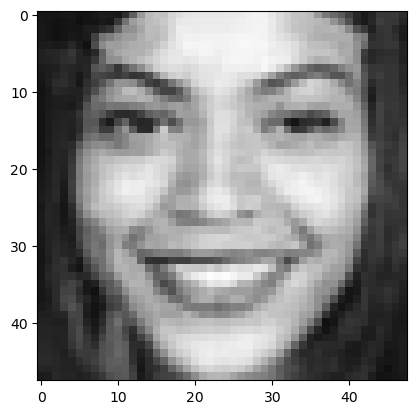

In [117]:
plt.imshow(images[1000])

In [118]:
print(ages[1000])

16


In [119]:
print(genders[1000])

1


In [120]:
images_f=np.array(images)
ages_f=np.array(ages)
genders_f=np.array(genders)

In [121]:
np.save(fldr+'image.npy',images_f)
np.save(fldr+'ages.npy',ages_f)
np.save(fldr+'genders.npy',genders_f)

In [122]:
#the number of males and females  samples respectively
values,counts=np.unique(genders_f,return_counts=True)
print(counts)

[12391 11317]


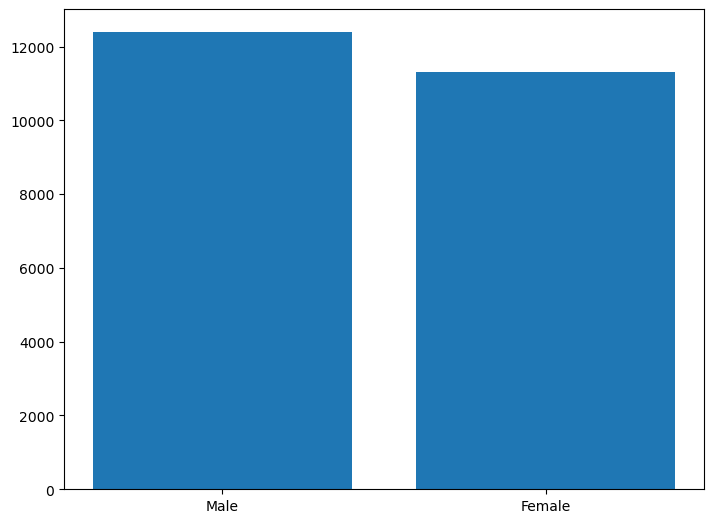

In [123]:
#plotting the number of males and females  samples
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
gender=['Male','Female']
values=[12391,11317]
ax.bar(gender,values)
plt.show()

In [125]:
#finding the no of samples in each age
values,counts=np.unique(ages_f,return_counts=True)
print(counts)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


In [127]:
#plotting the samples agewise
val=values.tolist()
cnt=counts.tolist()

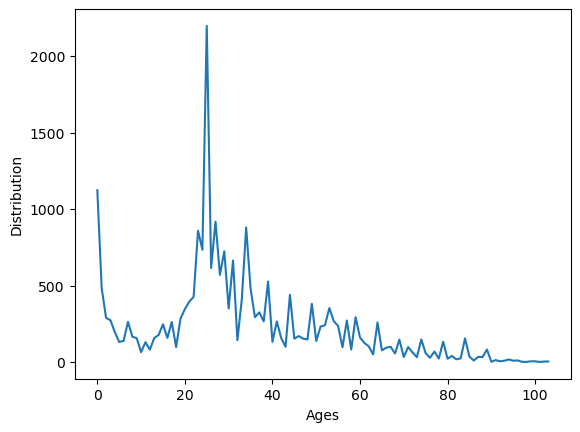

In [128]:
#plottting the samples agewise
plt.plot(counts)
plt.xlabel("Ages")
plt.ylabel("Distribution")
plt.show()

In [129]:
#defining labels for output
labels=[]
i=0
while i<len(ages):
    label=[]
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)
    i=i+1

In [130]:
#creating another list of images from existing one
images_f_2=images_f/255

In [131]:
labels_f=np.array(labels)

In [132]:
images_f_2.shape

(23708, 48, 48, 3)

In [133]:
#splitting the data set into train and test 
from sklearn.model_selection import train_test_split


In [134]:
X_train,X_test,Y_train,Y_test=train_test_split(images_f_2,labels_f,test_size=0.25)

In [135]:
Y_train[0:5]

array([[56,  1],
       [28,  1],
       [67,  0],
       [ 1,  1],
       [ 1,  1]])

In [136]:
#Splitting Y_test and Y_train further 
Y_train_2=[Y_train[:,1],Y_train[:,0]]
Y_test_2=[Y_test[:,1],Y_test[:,0]]

In [137]:
Y_train_2[0][0:5]

array([1, 1, 0, 1, 1])

In [138]:
Y_train_2[1][0:5]

array([56, 28, 67,  1,  1])

# DEFINING THE MODEL


In [140]:
#HOW OUR MODEL WILL WORK
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,Adamax,RMSprop
def Convolution(input_tensor,filters):
    x=Conv2D(filters=filters,kernel_size=(3,3),padding="same",strides=(1,1),kernel_regularizer=l2(0.001))(input_tensor)
    x=Dropout(0.1)(x)
    x=Activation('relu')(x)
    return x

In [141]:
def model(input_shape):
        inputs=Input((input_shape))
        conv_1=Convolution(inputs,32)
        maxp_1=MaxPooling2D(pool_size=(2,2))(conv_1)
        conv_2=Convolution(maxp_1,64)
        maxp_2=MaxPooling2D(pool_size=(2,2))(conv_2)
        conv_3=Convolution(maxp_2,128)
        maxp_3=MaxPooling2D(pool_size=(2,2))(conv_3)
        conv_4=Convolution(maxp_3,256)
        maxp_4=MaxPooling2D(pool_size=(2,2))(conv_4)
        flatten=Flatten()(maxp_4)
        dense_1=Dense(64,activation='relu')(flatten)
        dense_2=Dense(64,activation='relu')(flatten)
        drop_1=Dropout(0.2)(dense_1)
        drop_2=Dropout(0.2)(dense_2)
        output_1=Dense(1,activation='sigmoid',name='sex_out')(drop_1)
        output_2=Dense(1,activation='relu',name='age_out')(drop_2)
        model=Model(inputs=[inputs],outputs=[output_1,output_2])
        model.compile(loss=["binary_crossentropy","mae"],optimizer="Adam",metrics=["accuracy"])
        return model

In [145]:
Model=model((48,48,3))

In [146]:
Model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_10 (InputLayer)       [(None, 48, 48, 3)]          0         []                            
                                                                                                  
 conv2d_11 (Conv2D)          (None, 48, 48, 32)           896       ['input_10[0][0]']            
                                                                                                  
 dropout_15 (Dropout)        (None, 48, 48, 32)           0         ['conv2d_11[0][0]']           
                                                                                                  
 activation_11 (Activation)  (None, 48, 48, 32)           0         ['dropout_15[0][0]']          
                                                                                            

In [162]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [163]:
fle_s='Age_Sex_Detection.h5'
checkpoint=ModelCheckpoint(fle_s,monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=75,monitor='val_loss',restore_best_weights='True')
callback_list=[checkpoint,Early_stop]

In [166]:
History=Model.fit(X_train,Y_train_2,batch_size=64,validation_data=(X_test,Y_test_2),epochs=250,callbacks=callback_list)

Epoch 1/250


C:\Users\KIIT\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(



278/278 [==============================] - ETA: 0s - loss: 17.4418 - sex_out_loss: 0.6940 - age_out_loss: 16.5661 - sex_out_accuracy: 0.5247 - age_out_accuracy: 0.0481
Epoch 1: val_loss improved from inf to 17.15545, saving model to Age_Sex_Detection.h5
278/278 [==============================] - 106s 379ms/step - loss: 17.4418 - sex_out_loss: 0.6940 - age_out_loss: 16.5661 - sex_out_accuracy: 0.5247 - age_out_accuracy: 0.0481 - val_loss: 17.1554 - val_sex_out_loss: 0.6925 - val_age_out_loss: 16.3066 - val_sex_out_accuracy: 0.5224 - val_age_out_accuracy: 0.0445
Epoch 2/250


C:\Users\KIIT\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


278/278 [==============================] - ETA: 0s - loss: 15.1040 - sex_out_loss: 0.6721 - age_out_loss: 14.2519 - sex_out_accuracy: 0.5560 - age_out_accuracy: 0.0483
Epoch 2: val_loss improved from 17.15545 to 15.59956, saving model to Age_Sex_Detection.h5
278/278 [==============================] - 105s 379ms/step - loss: 15.1040 - sex_out_loss: 0.6721 - age_out_loss: 14.2519 - sex_out_accuracy: 0.5560 - age_out_accuracy: 0.0483 - val_loss: 15.5996 - val_sex_out_loss: 0.5949 - val_age_out_loss: 14.7807 - val_sex_out_accuracy: 0.7157 - val_age_out_accuracy: 0.0445
Epoch 3/250
278/278 [==============================] - ETA: 0s - loss: 12.1133 - sex_out_loss: 0.5702 - age_out_loss: 11.2846 - sex_out_accuracy: 0.6849 - age_out_accuracy: 0.0448
Epoch 3: val_loss improved from 15.59956 to 11.69720, saving model to Age_Sex_Detection.h5
278/278 [==============================] - 102s 368ms/step - loss: 12.1133 - sex_out_loss: 0.5702 - age_out_loss: 11.2846 - sex_out_accuracy: 0.6849 - age_ou

Epoch 17/250
278/278 [==============================] - ETA: 0s - loss: 7.9200 - sex_out_loss: 0.3759 - age_out_loss: 7.0228 - sex_out_accuracy: 0.7937 - age_out_accuracy: 0.0483
Epoch 17: val_loss did not improve from 8.84815
278/278 [==============================] - 99s 357ms/step - loss: 7.9200 - sex_out_loss: 0.3759 - age_out_loss: 7.0228 - sex_out_accuracy: 0.7937 - age_out_accuracy: 0.0483 - val_loss: 9.0814 - val_sex_out_loss: 0.3004 - val_age_out_loss: 8.2528 - val_sex_out_accuracy: 0.8711 - val_age_out_accuracy: 0.0445
Epoch 18/250
278/278 [==============================] - ETA: 0s - loss: 7.8346 - sex_out_loss: 0.3609 - age_out_loss: 6.9378 - sex_out_accuracy: 0.7914 - age_out_accuracy: 0.0483
Epoch 18: val_loss improved from 8.84815 to 8.80756, saving model to Age_Sex_Detection.h5
278/278 [==============================] - 148s 535ms/step - loss: 7.8346 - sex_out_loss: 0.3609 - age_out_loss: 6.9378 - sex_out_accuracy: 0.7914 - age_out_accuracy: 0.0483 - val_loss: 8.8076 - v

Epoch 32/250
278/278 [==============================] - ETA: 0s - loss: 6.9385 - sex_out_loss: 0.2573 - age_out_loss: 5.9704 - sex_out_accuracy: 0.8768 - age_out_accuracy: 0.0483
Epoch 32: val_loss did not improve from 8.07218
278/278 [==============================] - 107s 384ms/step - loss: 6.9385 - sex_out_loss: 0.2573 - age_out_loss: 5.9704 - sex_out_accuracy: 0.8768 - age_out_accuracy: 0.0483 - val_loss: 9.0455 - val_sex_out_loss: 0.2612 - val_age_out_loss: 8.0696 - val_sex_out_accuracy: 0.8853 - val_age_out_accuracy: 0.0445
Epoch 33/250
278/278 [==============================] - ETA: 0s - loss: 6.9212 - sex_out_loss: 0.2600 - age_out_loss: 5.9426 - sex_out_accuracy: 0.8742 - age_out_accuracy: 0.0483
Epoch 33: val_loss did not improve from 8.07218
278/278 [==============================] - 106s 383ms/step - loss: 6.9212 - sex_out_loss: 0.2600 - age_out_loss: 5.9426 - sex_out_accuracy: 0.8742 - age_out_accuracy: 0.0483 - val_loss: 9.0361 - val_sex_out_loss: 0.2543 - val_age_out_los

278/278 [==============================] - ETA: 0s - loss: 6.5479 - sex_out_loss: 0.2315 - age_out_loss: 5.4744 - sex_out_accuracy: 0.8921 - age_out_accuracy: 0.0482
Epoch 47: val_loss did not improve from 7.70908
278/278 [==============================] - 106s 380ms/step - loss: 6.5479 - sex_out_loss: 0.2315 - age_out_loss: 5.4744 - sex_out_accuracy: 0.8921 - age_out_accuracy: 0.0482 - val_loss: 9.4490 - val_sex_out_loss: 0.2498 - val_age_out_loss: 8.3542 - val_sex_out_accuracy: 0.8880 - val_age_out_accuracy: 0.0445
Epoch 48/250
278/278 [==============================] - ETA: 0s - loss: 6.5717 - sex_out_loss: 0.2359 - age_out_loss: 5.4869 - sex_out_accuracy: 0.8888 - age_out_accuracy: 0.0475
Epoch 48: val_loss did not improve from 7.70908
278/278 [==============================] - 82s 295ms/step - loss: 6.5717 - sex_out_loss: 0.2359 - age_out_loss: 5.4869 - sex_out_accuracy: 0.8888 - age_out_accuracy: 0.0475 - val_loss: 8.0046 - val_sex_out_loss: 0.2483 - val_age_out_loss: 6.9029 - va

278/278 [==============================] - ETA: 0s - loss: 6.3840 - sex_out_loss: 0.2245 - age_out_loss: 5.2324 - sex_out_accuracy: 0.8943 - age_out_accuracy: 0.0466
Epoch 62: val_loss did not improve from 7.51655
278/278 [==============================] - 92s 331ms/step - loss: 6.3840 - sex_out_loss: 0.2245 - age_out_loss: 5.2324 - sex_out_accuracy: 0.8943 - age_out_accuracy: 0.0466 - val_loss: 8.0513 - val_sex_out_loss: 0.2507 - val_age_out_loss: 6.8697 - val_sex_out_accuracy: 0.8870 - val_age_out_accuracy: 0.0445
Epoch 63/250
278/278 [==============================] - ETA: 0s - loss: 6.3518 - sex_out_loss: 0.2200 - age_out_loss: 5.1996 - sex_out_accuracy: 0.8966 - age_out_accuracy: 0.0463
Epoch 63: val_loss did not improve from 7.51655
278/278 [==============================] - 83s 298ms/step - loss: 6.3518 - sex_out_loss: 0.2200 - age_out_loss: 5.1996 - sex_out_accuracy: 0.8966 - age_out_accuracy: 0.0463 - val_loss: 9.2911 - val_sex_out_loss: 0.2549 - val_age_out_loss: 8.1015 - val

278/278 [==============================] - 86s 310ms/step - loss: 6.1105 - sex_out_loss: 0.2098 - age_out_loss: 4.9184 - sex_out_accuracy: 0.9016 - age_out_accuracy: 0.0446 - val_loss: 8.3534 - val_sex_out_loss: 0.2535 - val_age_out_loss: 7.1157 - val_sex_out_accuracy: 0.8940 - val_age_out_accuracy: 0.0445
Epoch 78/250
278/278 [==============================] - ETA: 0s - loss: 6.1813 - sex_out_loss: 0.2077 - age_out_loss: 4.9872 - sex_out_accuracy: 0.9001 - age_out_accuracy: 0.0458
Epoch 78: val_loss did not improve from 7.51655
278/278 [==============================] - 90s 318ms/step - loss: 6.1813 - sex_out_loss: 0.2077 - age_out_loss: 4.9872 - sex_out_accuracy: 0.9001 - age_out_accuracy: 0.0458 - val_loss: 7.7650 - val_sex_out_loss: 0.2529 - val_age_out_loss: 6.5243 - val_sex_out_accuracy: 0.8927 - val_age_out_accuracy: 0.0445
Epoch 79/250
278/278 [==============================] - ETA: 0s - loss: 6.1645 - sex_out_loss: 0.2080 - age_out_loss: 4.9674 - sex_out_accuracy: 0.9020 - age

Epoch 93/250
278/278 [==============================] - ETA: 0s - loss: 6.0717 - sex_out_loss: 0.2038 - age_out_loss: 4.8370 - sex_out_accuracy: 0.9013 - age_out_accuracy: 0.0443
Epoch 93: val_loss did not improve from 7.51655
278/278 [==============================] - 93s 333ms/step - loss: 6.0717 - sex_out_loss: 0.2038 - age_out_loss: 4.8370 - sex_out_accuracy: 0.9013 - age_out_accuracy: 0.0443 - val_loss: 7.8369 - val_sex_out_loss: 0.2506 - val_age_out_loss: 6.5535 - val_sex_out_accuracy: 0.8952 - val_age_out_accuracy: 0.0445
Epoch 94/250
278/278 [==============================] - ETA: 0s - loss: 6.0946 - sex_out_loss: 0.2040 - age_out_loss: 4.8570 - sex_out_accuracy: 0.9030 - age_out_accuracy: 0.0435
Epoch 94: val_loss did not improve from 7.51655
278/278 [==============================] - 83s 298ms/step - loss: 6.0946 - sex_out_loss: 0.2040 - age_out_loss: 4.8570 - sex_out_accuracy: 0.9030 - age_out_accuracy: 0.0435 - val_loss: 8.0714 - val_sex_out_loss: 0.2535 - val_age_out_loss:

278/278 [==============================] - ETA: 0s - loss: 5.9546 - sex_out_loss: 0.1885 - age_out_loss: 4.7090 - sex_out_accuracy: 0.9123 - age_out_accuracy: 0.0409
Epoch 108: val_loss did not improve from 7.51655
278/278 [==============================] - 90s 324ms/step - loss: 5.9546 - sex_out_loss: 0.1885 - age_out_loss: 4.7090 - sex_out_accuracy: 0.9123 - age_out_accuracy: 0.0409 - val_loss: 8.2553 - val_sex_out_loss: 0.2668 - val_age_out_loss: 6.9316 - val_sex_out_accuracy: 0.8922 - val_age_out_accuracy: 0.0445
Epoch 109/250
278/278 [==============================] - ETA: 0s - loss: 6.0237 - sex_out_loss: 0.1919 - age_out_loss: 4.7736 - sex_out_accuracy: 0.9163 - age_out_accuracy: 0.0432
Epoch 109: val_loss did not improve from 7.51655
278/278 [==============================] - 85s 302ms/step - loss: 6.0237 - sex_out_loss: 0.1919 - age_out_loss: 4.7736 - sex_out_accuracy: 0.9163 - age_out_accuracy: 0.0432 - val_loss: 7.9991 - val_sex_out_loss: 0.2624 - val_age_out_loss: 6.6766 - 

278/278 [==============================] - ETA: 0s - loss: 5.8699 - sex_out_loss: 0.1757 - age_out_loss: 4.6165 - sex_out_accuracy: 0.9282 - age_out_accuracy: 0.0401
Epoch 123: val_loss did not improve from 7.51655
278/278 [==============================] - 93s 336ms/step - loss: 5.8699 - sex_out_loss: 0.1757 - age_out_loss: 4.6165 - sex_out_accuracy: 0.9282 - age_out_accuracy: 0.0401 - val_loss: 8.0730 - val_sex_out_loss: 0.2613 - val_age_out_loss: 6.7332 - val_sex_out_accuracy: 0.8917 - val_age_out_accuracy: 0.0445
Epoch 124/250
278/278 [==============================] - ETA: 0s - loss: 5.8550 - sex_out_loss: 0.1771 - age_out_loss: 4.5989 - sex_out_accuracy: 0.9266 - age_out_accuracy: 0.0405
Epoch 124: val_loss did not improve from 7.51655
278/278 [==============================] - 83s 298ms/step - loss: 5.8550 - sex_out_loss: 0.1771 - age_out_loss: 4.5989 - sex_out_accuracy: 0.9266 - age_out_accuracy: 0.0405 - val_loss: 8.5089 - val_sex_out_loss: 0.2678 - val_age_out_loss: 7.1616 - 

In [167]:
Model.compile

<bound method Model.compile of <keras.src.engine.functional.Functional object at 0x000002DC691BDC60>>

In [168]:
tf.config.run_functions_eagerly(True)

In [169]:
#plotting results
Model.evaluate(X_test,Y_test_2)

186/186 [==============================] - 12s 63ms/step - loss: 7.5166 - sex_out_loss: 0.2610 - age_out_loss: 6.3468 - sex_out_accuracy: 0.8822 - age_out_accuracy: 0.0444


[7.516554832458496,
 0.2610113322734833,
 6.346759796142578,
 0.8822338581085205,
 0.04437320679426193]

In [170]:
pred=Model.predict(X_test)

186/186 [==============================] - 8s 44ms/step


In [171]:
pred[1]

array([[38.122284 ],
       [ 2.1390314],
       [22.172209 ],
       ...,
       [25.936174 ],
       [24.351974 ],
       [18.257868 ]], dtype=float32)

# PLOTTING LOSS FUNCTION

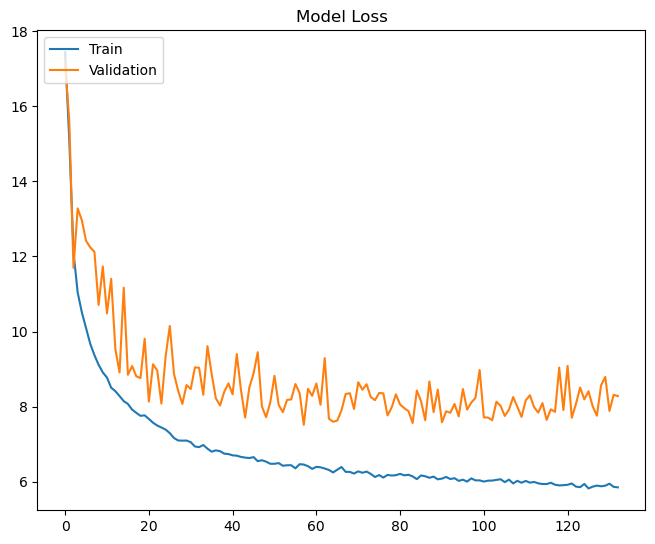

In [172]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.xlabel=('Epoch')
plt.ylabel=('Loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

# PLOTTING SEX ACCURACY

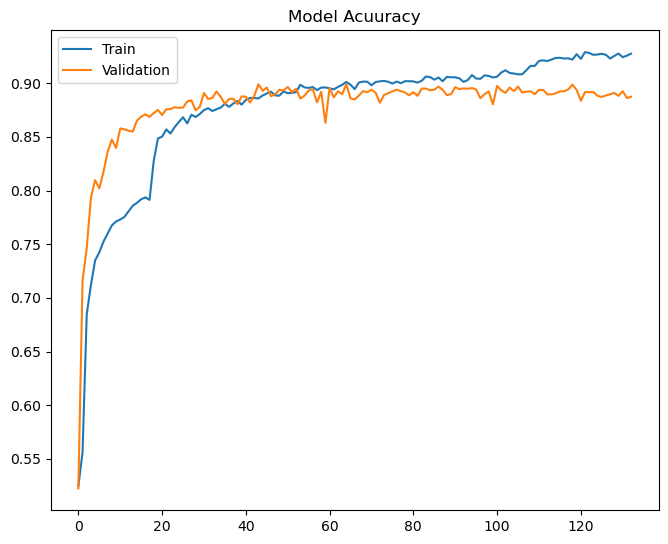

In [173]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('Model Acuuracy')
plt.xlabel=('Epoch')
plt.ylabel=('Accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

# PLOTTING AGE ACCURACY

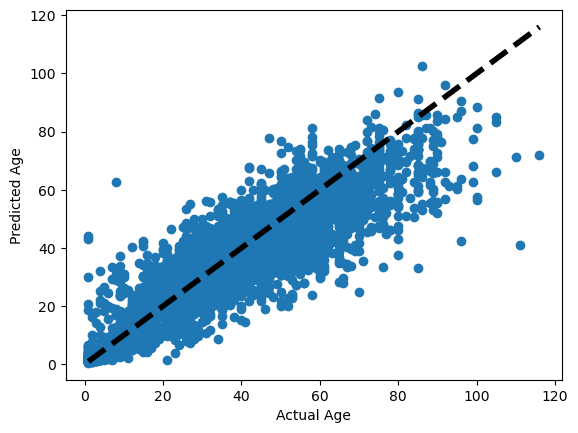

In [176]:
fig,ax=plt.subplots()
ax.scatter(Y_test_2[1],pred[1])
ax.plot([Y_test_2[1].min(),Y_test_2[1].max()],[Y_test_2[1].min(),Y_test_2[1].max()],'k--',lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()

# REPORT AND CHECKING OF MODEL

In [177]:
i=0
Pred_l=[]
while(i<len(pred[0])):
    Pred_l.append(int(np.round(pred[0][i])))
    i=i+1

In [179]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [180]:
report=classification_report(Y_test_2[0],Pred_l)

In [181]:
print(report)

              precision    recall  f1-score   support

           0       0.90      0.87      0.89      3096
           1       0.87      0.89      0.88      2831

    accuracy                           0.88      5927
   macro avg       0.88      0.88      0.88      5927
weighted avg       0.88      0.88      0.88      5927



In [184]:
results=confusion_matrix(Y_test_2[0],Pred_l)

<Axes: >

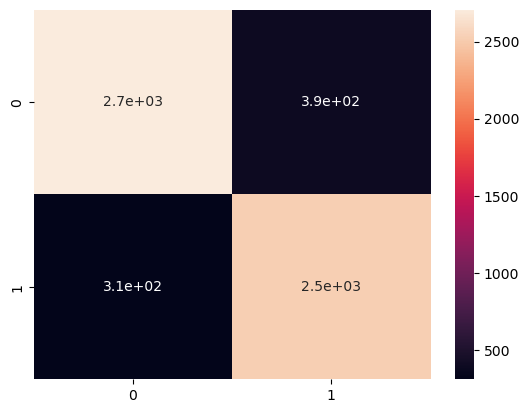

In [185]:
#making heatmap of the model (gender only)
import seaborn as sns
sns.heatmap(results,annot=True)

In [189]:
#Testing the image
def test_image(ind,iamges_f,images_f_2,Model):
    plt.imshow(images_f[ind])
    image_test=images_f_2[ind]
    pred_l=Model.predict(np.array([image_test]))
    sex_f=['Male','Female']
    age=int(np.round(pred_l[1][0]))
    sex=int(np.round(pred_l[0][0]))
    print("Predicted Age is "+str(age))
    print("Predicted Gender is "+sex_f[sex])

1/1 [==============================] - 0s 81ms/step


C:\Users\KIIT\anaconda3\lib\site-packages\tensorflow\python\data\ops\structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


Predicted Age is 86
Predicted Gender is Female


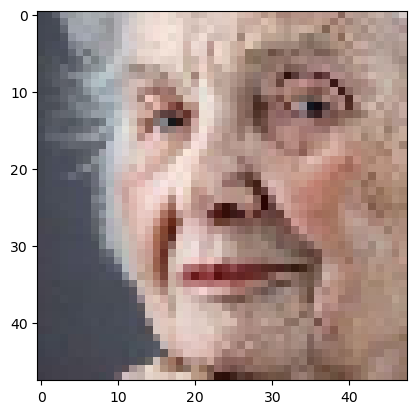

In [190]:
test_image(4,images_f,images_f_2,Model)

1/1 [==============================] - 0s 76ms/step
Predicted Age is 11
Predicted Gender is Male


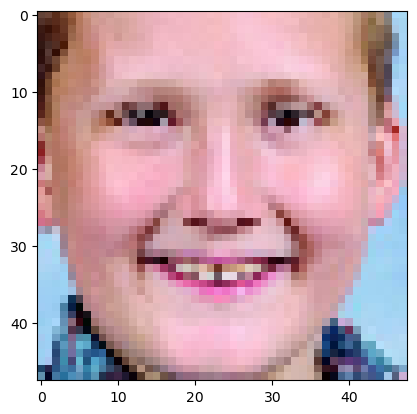

In [193]:
test_image(20,images_f,images_f_2,Model)

1/1 [==============================] - 0s 78ms/step
Predicted Age is 1
Predicted Gender is Male


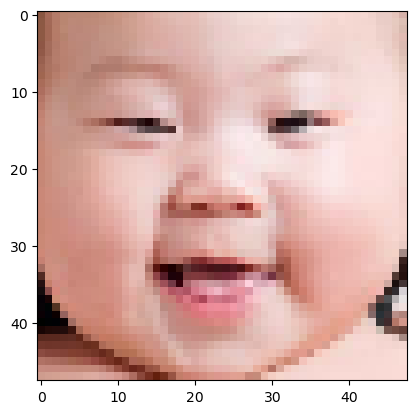

In [195]:
test_image(2000,images_f,images_f_2,Model)

1/1 [==============================] - 0s 74ms/step
Predicted Age is 9
Predicted Gender is Male


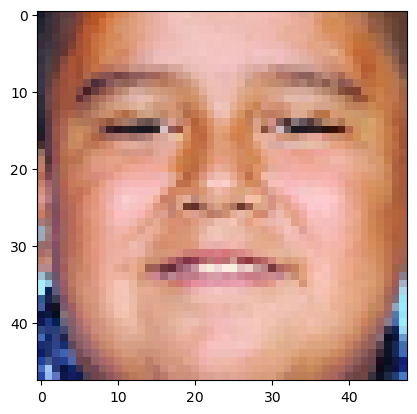

In [196]:
test_image(290,images_f,images_f_2,Model)

1/1 [==============================] - 0s 76ms/step
Predicted Age is 9
Predicted Gender is Female


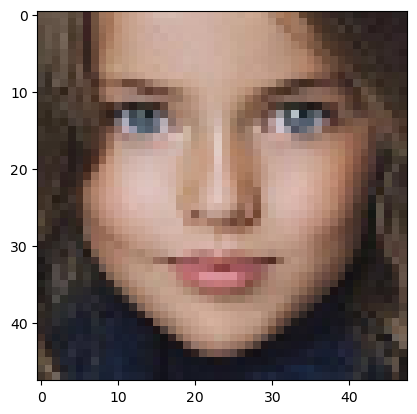

In [197]:
test_image(120,images_f,images_f_2,Model)

1/1 [==============================] - 0s 57ms/step
Predicted Age is 30
Predicted Gender is Female


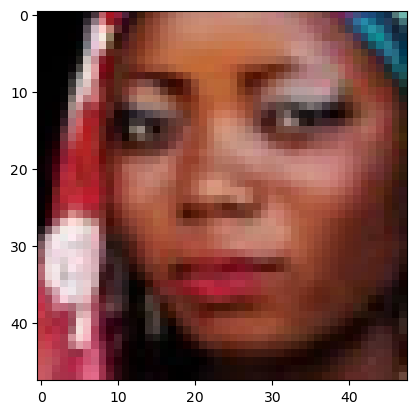

In [198]:
test_image(7000,images_f,images_f_2,Model)